![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

# Project Outline

### Task 1: Understand and learn the dataset.
### Task 2: Clean the Data as best as possible.
### Task 3: Analyze Extremely and Visualize your insights.
### Task 4: Build Machine Learning models to cluster customers.
### Task 5: After clustering, analyze why each sample in the same cluster is alike, and how is each cluster different from the other clusters.
### Bonus: Feature Selection and Engineering, Use Plotly for visualizations.

# Team 6:

* Nour Sameh
* Ali AbdelHady
* Mohamed Mostafa
* Nour Madkour

# Importing libraries and Reading Data

In [ ]:

import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# check if the data normally distributed
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm

# Data analysis libraries
from scipy import stats
from scipy.stats import norm

# Preprocessing
from sklearn.preprocessing import RobustScaler

# Set up the matplotlib backend for inline plotting
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

In [ ]:
df = pd.read_csv('bank.csv')

##Data Description
 * **age:** Age of the individual.
 * **job:** Occupation or job of the individual.
 * **marital:** Marital status of the individual.
 * **education:** Level of education attained by the individual.
 * **default:** Whether the individual has credit in default or not.
 * **balance:** Balance in the individual's bank account.
 * **housing:** Whether the individual has a housing loan or not.
 * **loan:** Whether the individual has a personal loan or not.
 * **contact:** Type of communication contact.
 * **day:** Day of the month when the contact was made.
 * **month:** Month of the year when the contact was made.
 * **duration:**last contact duration, in seconds (numeric).This input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 * **campaign:** Number of contacts performed during this campaign for this individual.
 * **pdays:** Number of days that passed by after the client was last contacted from a previous campaign.
 * **previous:** Number of contacts performed before this campaign for this individual.
 * **poutcome:** Outcome of the previous marketing campaign.
 * **deposit**: Whether the individual has subscribed to a term deposit or not

# Task 1: Understanding the dataset and EDA

In [ ]:
df.shape

(11162, 17)

* Dataset consists of **```11162 rows```** and **```17 columns```**.

In [ ]:
df.head(20).style.background_gradient('Blues')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


We concluded that

*   job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit' need to be encoded
*   no null values but there might be unknown values



In [ ]:
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(include='int64').columns
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.describe().T


count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

*   **age** : mean age is 41 min is 18 , max 95
* The majority of individuals fall within the range of 32 to 49 years, with the median age (50th percentile) being 39 years.

*   **balance** : On average, individuals in the dataset report 1528.538524 min -6847 (money they have to give bank ,std is 3225.413326	suggests that there is a considerable variation or dispersion in the balances across the dataset.)


*  **day** : range from 1-31
* The median value of 15.0 suggests that half of the contacts were made before the 15th day of the month and half were made after
* On average, contacts were made around the 16th day of the month

*  **duration** :min 2 sec ,max 3881 which is 1 hr 4 minutes

* **pdays** :	The average number of days since the last contact is approximately 51.33 days.
* The std indicates the variability in the number of days.
* The minimum value of -1.0 represent cases where the client was never contacted before
* The median value of 20.75 suggests that half of the clients were last contacted within approximately 20.75 days.
* **previous** : The standard deviation indicates the variability in the number of previous contacts.
* min value 0.0 suggests that some individuals had no contacts before this campaign.
* max value of 58.0 indicates the highest number of contacts performed before this campaign.
* The median value of 1.00 suggests that half of the individuals had 1 or fewer previous contacts before this campaign.


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.describe(include='O').T

count unique         top   freq
job        11162     12  management   2566
marital    11162      3     married   6351
education  11162      4   secondary   5476
default    11162      2          no  10994
housing    11162      2          no   5881
loan       11162      2          no   9702
contact    11162      3    cellular   8042
month      11162     12         may   2824
poutcome   11162      4     unknown   8326
deposit    11162      2          no   5873

### categorical and numerical values

In [ ]:
categ_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include='int64').columns.tolist()

In [ ]:
for column in categ_cols:
    print(f"{column}'s Unique values: {df[column].unique()}")
    print("-------------\n")

job's Unique values: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
-------------

marital's Unique values: ['married' 'single' 'divorced']
-------------

education's Unique values: ['secondary' 'tertiary' 'primary' 'unknown']
-------------

default's Unique values: ['no' 'yes']
-------------

housing's Unique values: ['yes' 'no']
-------------

loan's Unique values: ['no' 'yes']
-------------

contact's Unique values: ['unknown' 'cellular' 'telephone']
-------------

month's Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
-------------

poutcome's Unique values: ['unknown' 'other' 'failure' 'success']
-------------

deposit's Unique values: ['yes' 'no']
-------------



In [ ]:
for column in num_cols:
    print(f"{column} Unique : {df[column].unique()}")
    print("-------------\n")

age Unique : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
-------------

balance Unique : [2343   45 1270 ... 1594 2593 -134]
-------------

day Unique : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
-------------

duration Unique : [1042 1467 1389 ... 1504  818 1812]
-------------

campaign Unique : [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
-------------

pdays Unique : [ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 23

### unknown

In [ ]:
for column in categ_cols:
    print(f"Number of 'unknown' values in {column}: {(df[column] == 'unknown').sum()}\n")

Number of 'unknown' values in job: 70

Number of 'unknown' values in marital: 0

Number of 'unknown' values in education: 497

Number of 'unknown' values in default: 0

Number of 'unknown' values in housing: 0

Number of 'unknown' values in loan: 0

Number of 'unknown' values in contact: 2346

Number of 'unknown' values in month: 0

Number of 'unknown' values in poutcome: 8326

Number of 'unknown' values in deposit: 0



In [ ]:
# Count rows where all specified columns are unknown
count_unknown_rows = df[(df['job'] == 'unknown') &
                        (df['education'] == 'unknown') &
                        (df['poutcome'] == 'unknown') &
                        (df['contact'] == 'unknown')&
                        (df['pdays'] == -1)].shape[0]

print("Number of rows with all specified columns unknown:", count_unknown_rows)

Number of rows with all specified columns unknown: 6


In [ ]:
df = df[~((df['job'] == 'unknown') &
          (df['education'] == 'unknown') &
          (df['poutcome'] == 'unknown') &
          (df['contact'] == 'unknown') &
          (df['pdays'] == -1))]

In [ ]:
columns_with_unknown = [column for column in categ_cols if (df[column] == 'unknown').any()]

In [ ]:
columns_with_unknown

['job', 'education', 'contact', 'poutcome']

we will plot the relations of ['education', 'contact', 'poutcome','job']

### Age

In [ ]:
df['age'].value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

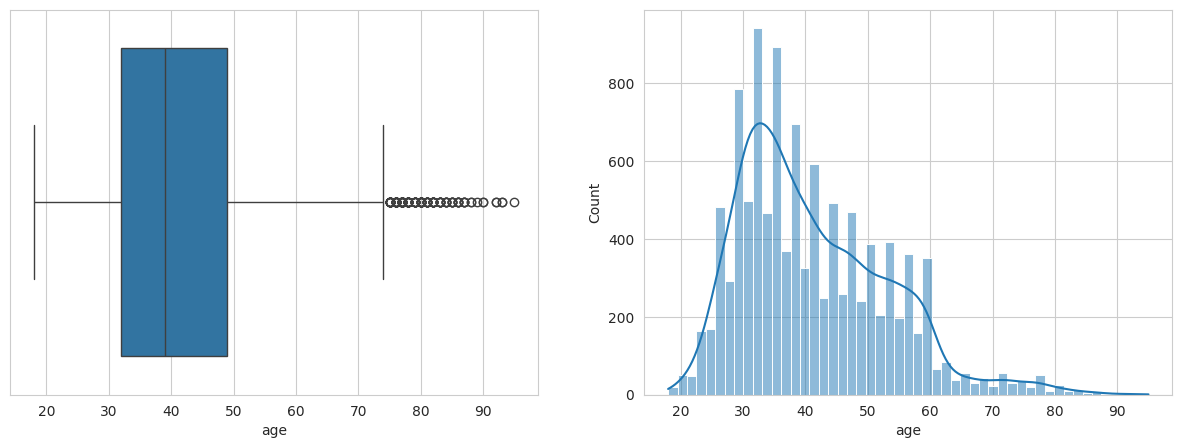

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['age'])
plt.subplot(1,2,2)
sns.histplot(x = df['age'], kde=True)

data in column age is right skewed and there are outliers

### job

In [ ]:
fig=px.bar(df.job.value_counts().reset_index().rename(columns={'index':'Job','job':'Count'}),x='Job',y='Count',color='Job',text='Count')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

In [ ]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            64
Name: job, dtype: int64

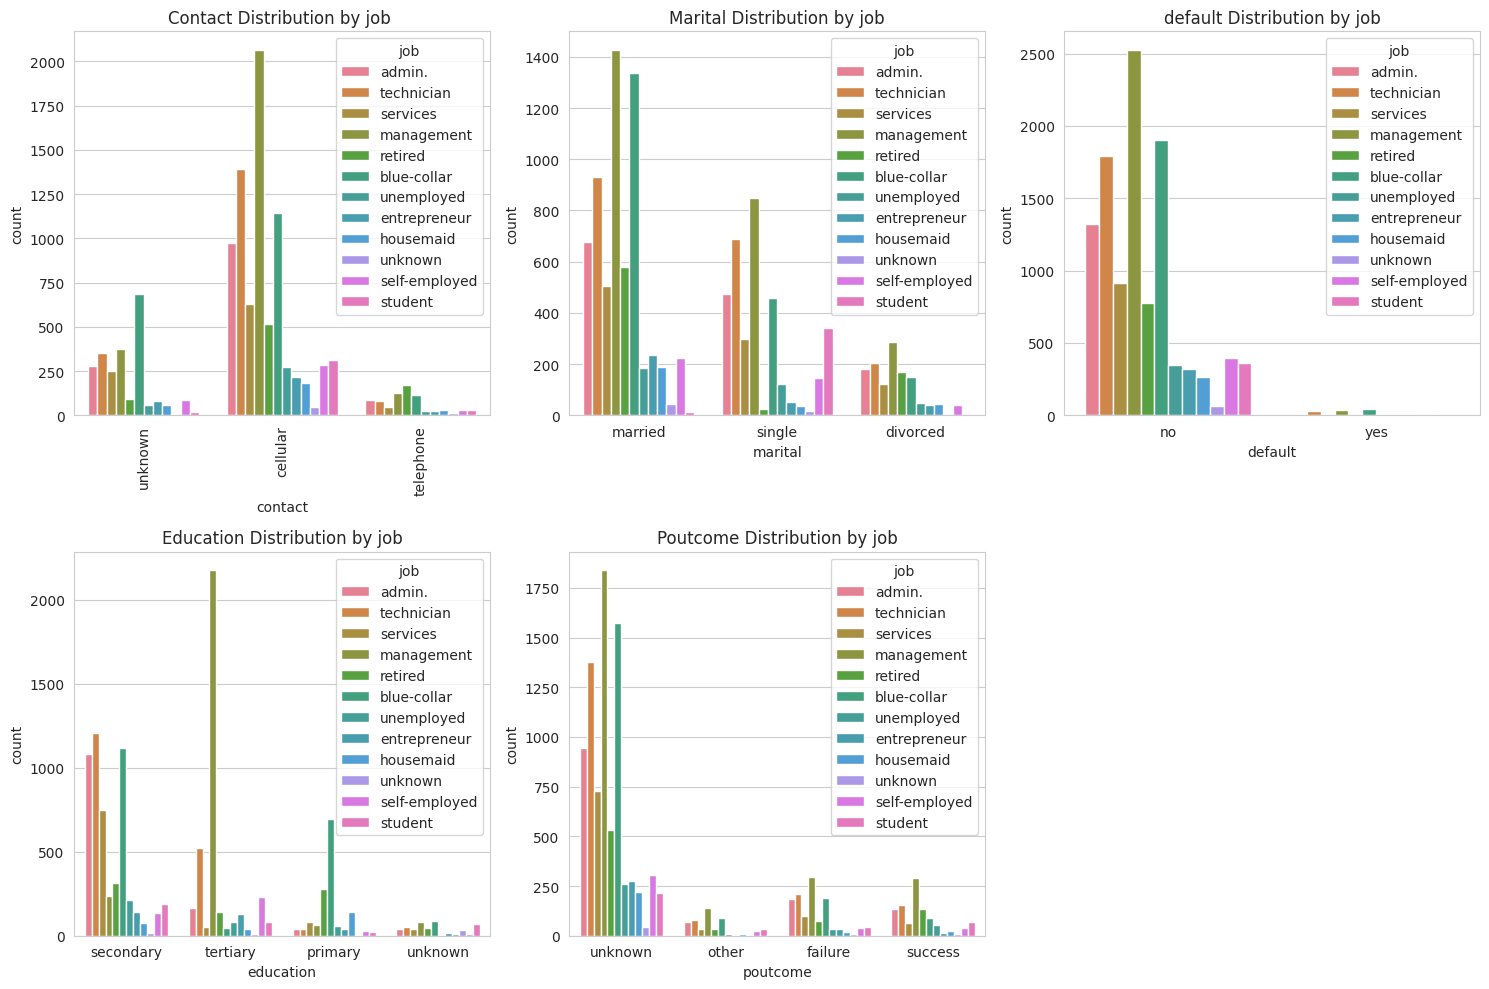

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot count plots for each feature grouped by 'job'
sns.countplot(x='contact', hue='job', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Contact Distribution by job ')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.countplot(x='marital', hue='job', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Marital Distribution by job')

sns.countplot(x='default', hue ='job',data = df , ax=axes[0,2])
axes[0, 2].set_title('default Distribution by job')

sns.countplot(x='education', hue='job', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution by job')

sns.countplot(x='poutcome', hue='job', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Poutcome Distribution by job')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

most of the unknown in job  are :
* cellullar in (contact)
*  marrid(Marital)
* no in (default)
* secondary edu(education)
* unknown also in (poutcome)
                        

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'blue-collar'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'self-employed'),
  Text(11, 0, 'student')])

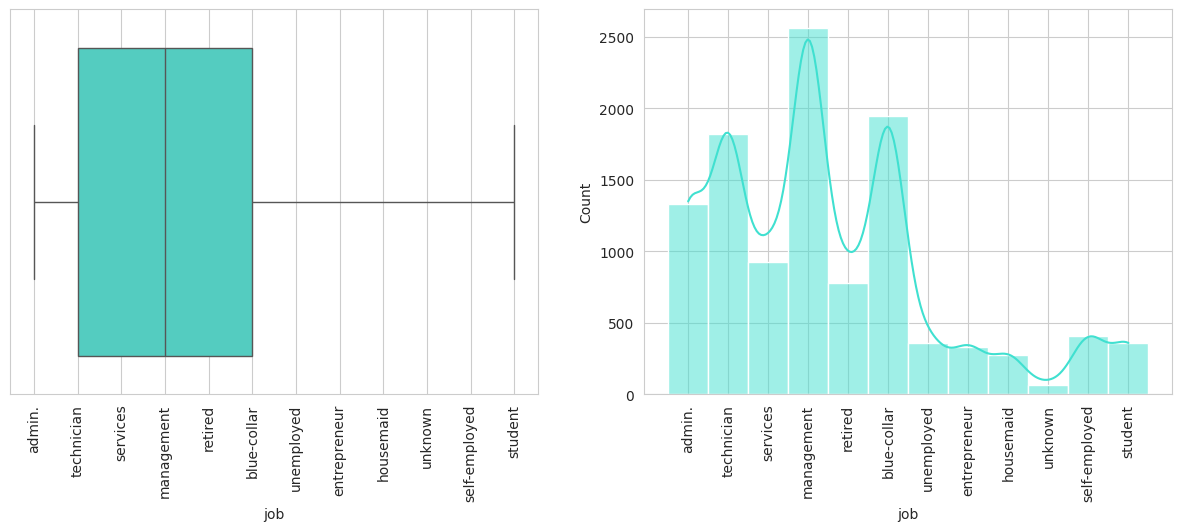

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['job'],color='turquoise')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.histplot(x = df['job'], kde=True,color='turquoise')
plt.xticks(rotation=90)

In [ ]:
unknown_jobs_df = df[df['job'] == 'unknown']
print(unknown_jobs_df)


       age      job  marital  education default  balance housing loan  \
66      49  unknown  married    primary      no      341     yes  yes   
668     52  unknown  married    unknown      no     5361      no   no   
861     60  unknown  married    unknown      no    17297      no   no   
1075    31  unknown  married  secondary      no      111      no   no   
1091    34  unknown   single  secondary      no      859      no   no   
...    ...      ...      ...        ...     ...      ...     ...  ...   
9845    36  unknown  married  secondary      no      179      no   no   
9976    43  unknown  married    primary      no        0     yes   no   
10570   77  unknown  married    unknown      no      397      no   no   
10660   54  unknown  married    unknown      no      390      no   no   
10805   51  unknown  married    unknown      no     2642      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
66       unknown   15   may       520         

no outliers so fill unknown with mode

### marital

In [ ]:
fig = px.pie(df, names='marital', title='marital Status Distribution',
             labels={'marital': 'marital'},
             color='marital',
            color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

In [ ]:
marital_Status = df.groupby('marital')['balance'].mean().reset_index()
marital_Status

marital      balance
0  divorced  1372.876161
1   married  1596.979991
2    single  1457.652260

### education

In [ ]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       491
Name: education, dtype: int64

"education" column, since the number of unknown values (491) is relatively small compared to the total number of data points (approximately 11,162) and the outliers are in unkown category

<Axes: xlabel='education', ylabel='count'>

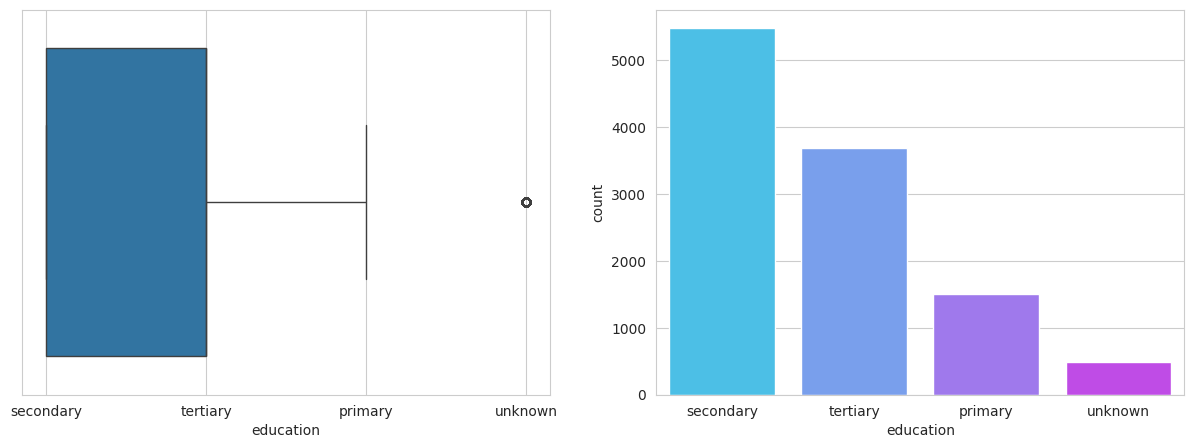

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['education'])
plt.subplot(1,2,2)
sns.countplot(x ='education',data=df,palette='cool')

In [ ]:
# Find the mode (most frequent category) of the 'education' column
mode_education = df['education'].mode()[0]

# Replace 'unknown' values with the mode
df['education'].replace('unknown', mode_education, inplace=True)

### contact

In [ ]:
df['contact'].value_counts()/df['contact'].shape[0]*100

cellular     72.086769
unknown      20.975260
telephone     6.937971
Name: contact, dtype: float64

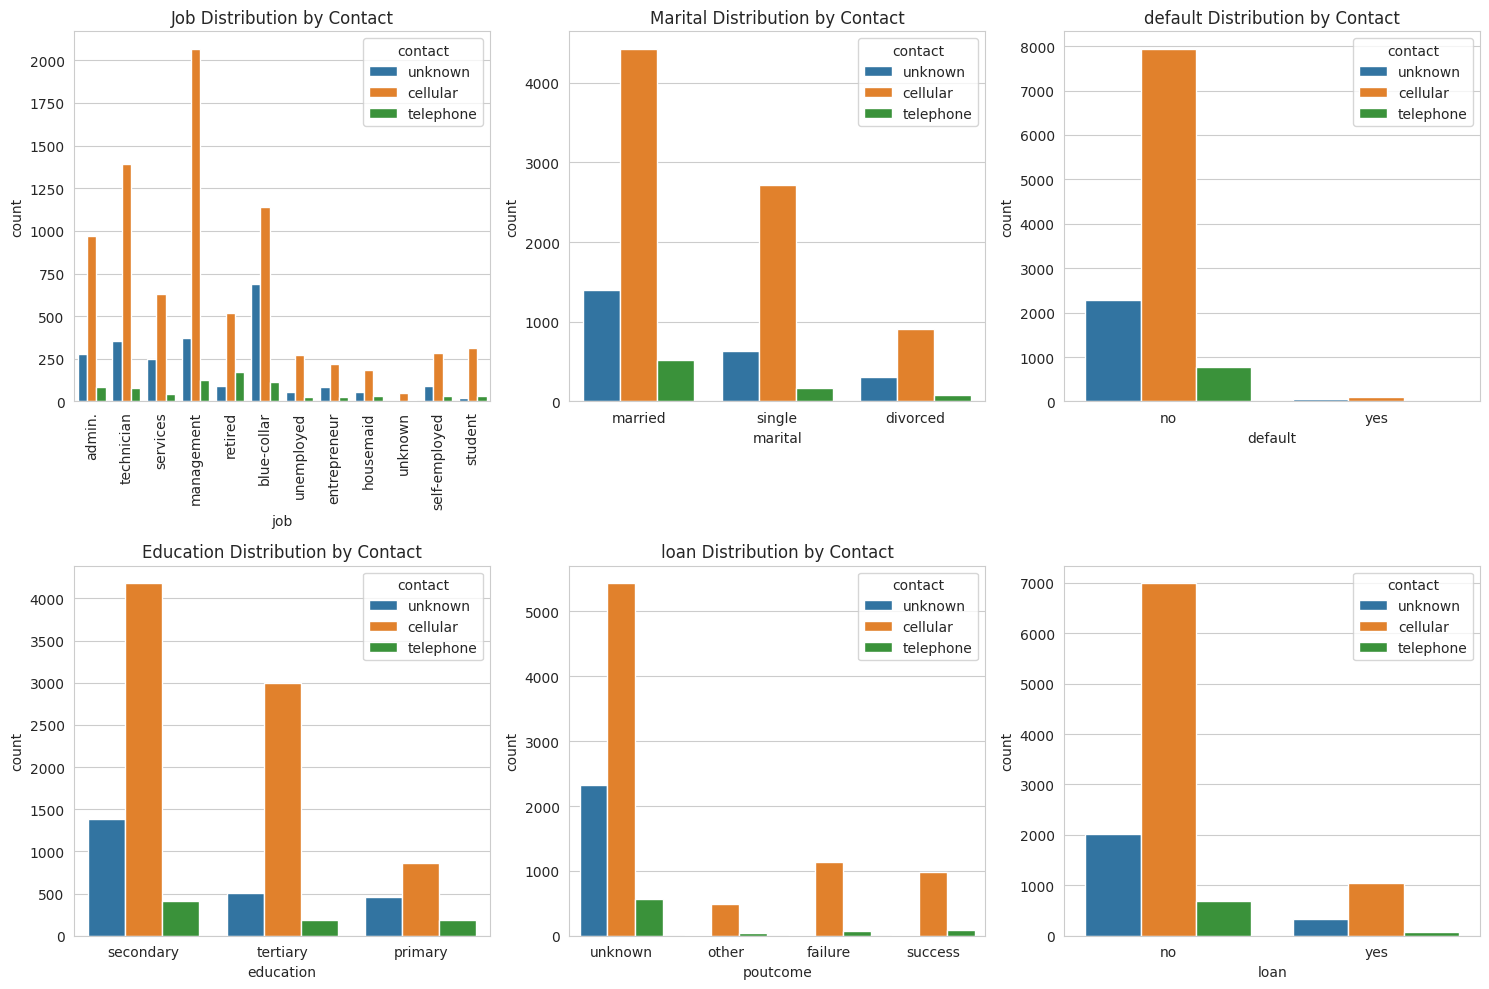

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot count plots for each feature grouped by 'contact'
sns.countplot(x='job', hue='contact', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Job Distribution by Contact')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.countplot(x='marital', hue='contact', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Marital Distribution by Contact')

sns.countplot(x='default', hue ='contact',data = df , ax=axes[0,2])
axes[0, 2].set_title('default Distribution by Contact')

sns.countplot(x='education', hue='contact', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution by Contact')

sns.countplot(x='poutcome', hue='contact', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Poutcome Distribution by Contact')

sns.countplot(x='loan', hue='contact', data=df, ax=axes[1, 2])
axes[1, 1].set_title('loan Distribution by Contact')


plt.tight_layout()
plt.show()

<Axes: xlabel='contact', ylabel='Count'>

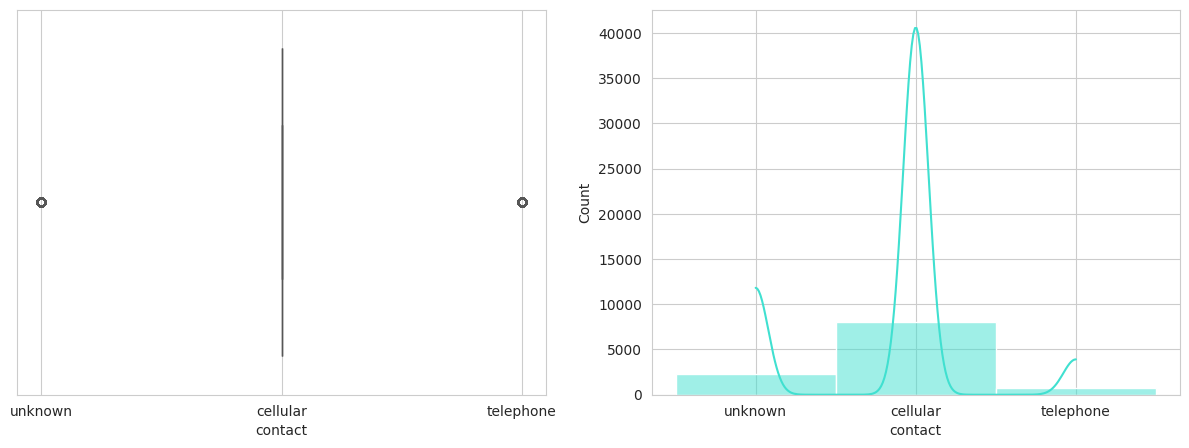

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['contact'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['contact'], kde=True,color='turquoise')

most of the unknown in contact  are :
*  blue coller (job)
*  marrid(Marital)
* no in (default)
* secondary edu(education)
* unknown also in (poutcome)
* most of ppl that dont have loan are cellular                        

### default

<Axes: xlabel='default', ylabel='count'>

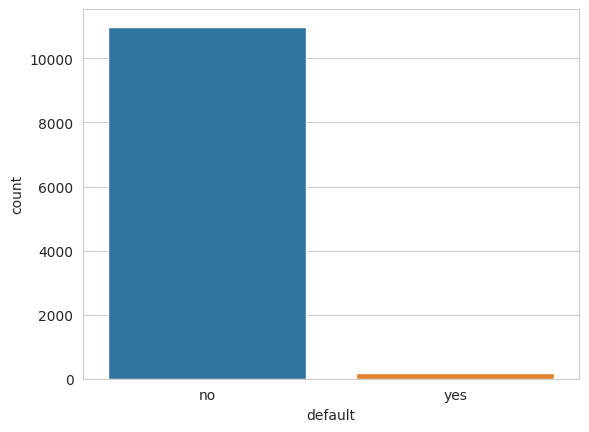

In [ ]:
sns.countplot(x='default', hue='default', data=df)

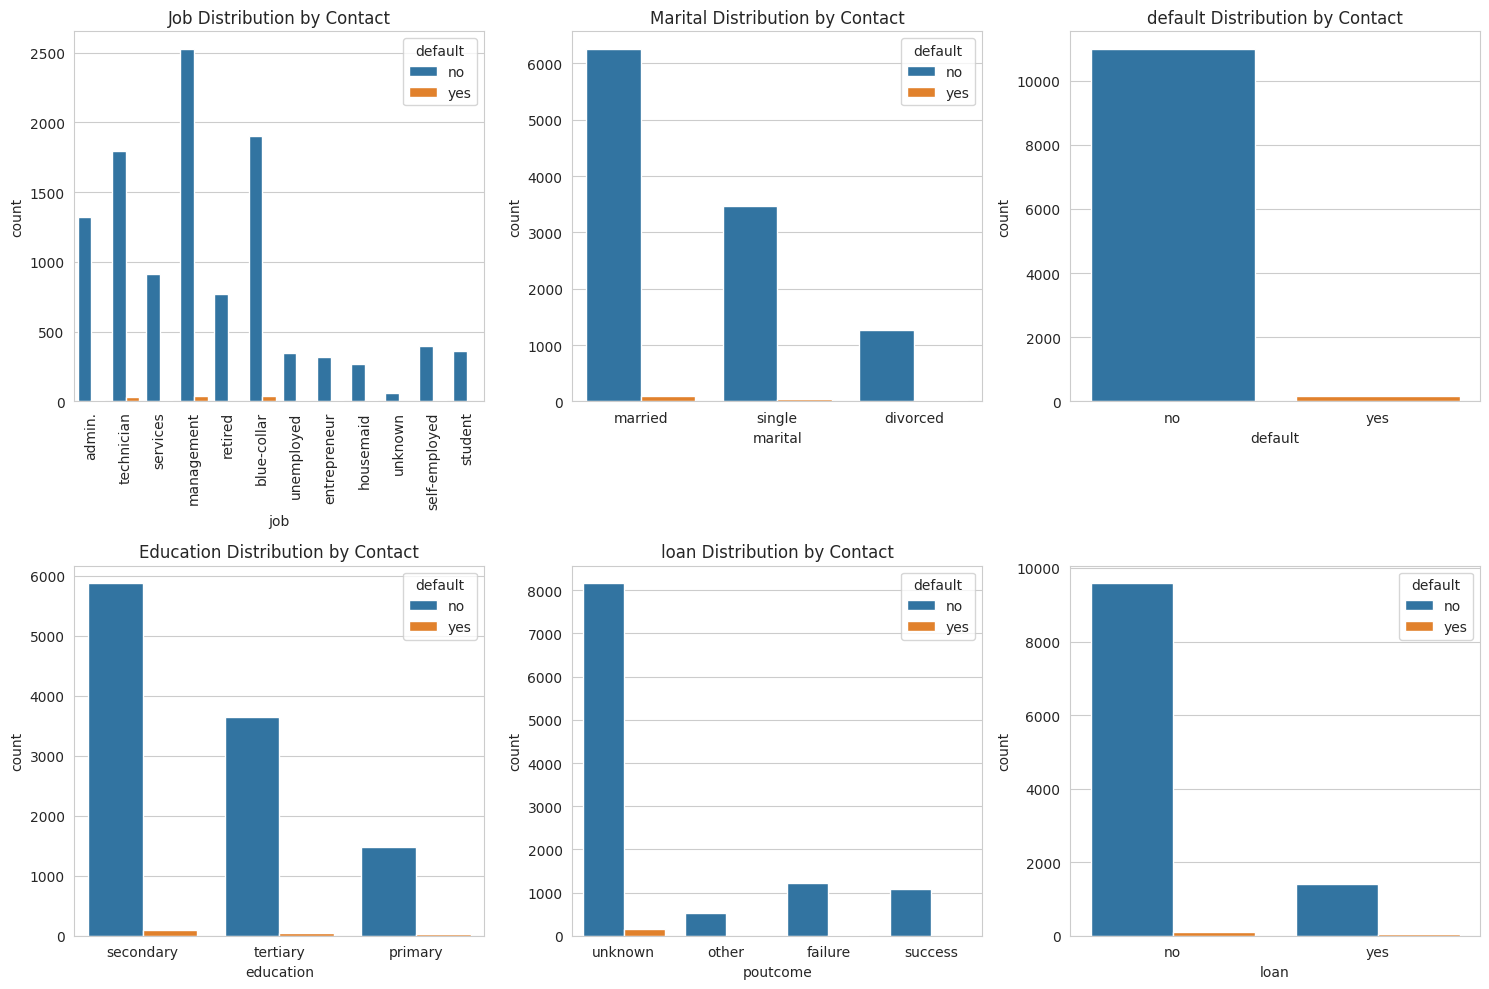

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot count plots for each feature grouped by 'default'
sns.countplot(x='job', hue='default', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Job Distribution by Contact')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.countplot(x='marital', hue='default', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Marital Distribution by Contact')

sns.countplot(x='default', hue ='default',data = df , ax=axes[0,2])
axes[0, 2].set_title('default Distribution by Contact')

sns.countplot(x='education', hue='default', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution by Contact')

sns.countplot(x='poutcome', hue='default', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Poutcome Distribution by Contact')

sns.countplot(x='loan', hue='default', data=df, ax=axes[1, 2])
axes[1, 1].set_title('loan Distribution by Contact')


plt.tight_layout()
plt.show()

most of the defaulkt is no which is expected as the camain target ppl that dont has credit in default

### balance

In [ ]:
df['balance'].value_counts()

 0        774
 1         39
 3         35
 2         34
 4         29
         ... 
 8332       1
 4859       1
-267        1
 12356      1
-134        1
Name: balance, Length: 3804, dtype: int64

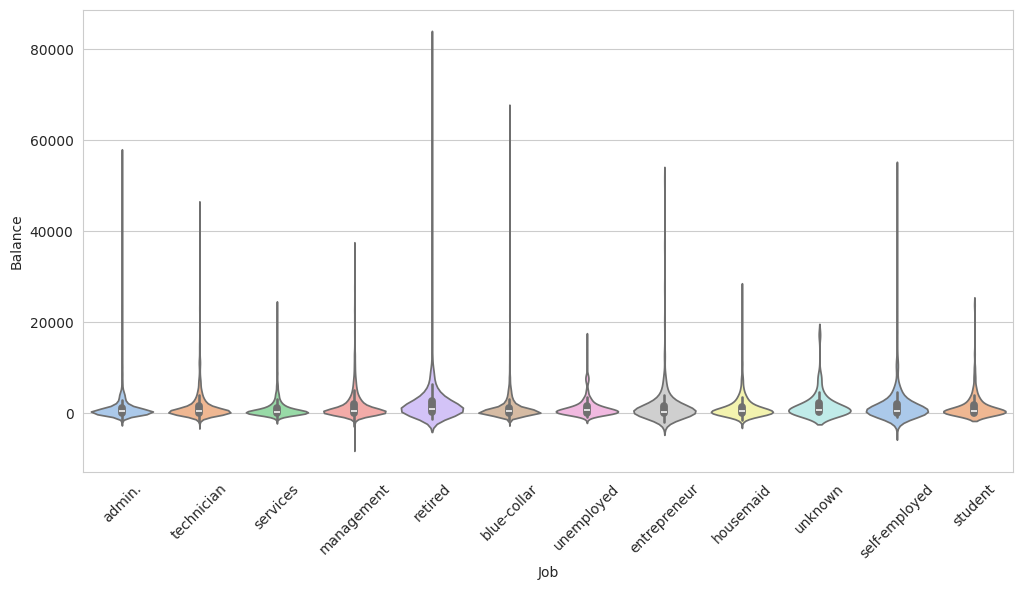

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='job', y='balance', data=df, palette='pastel')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()


blue-collar and Retirees are the ones who have the highest balance in their accounts.

<Axes: xlabel='balance', ylabel='Count'>

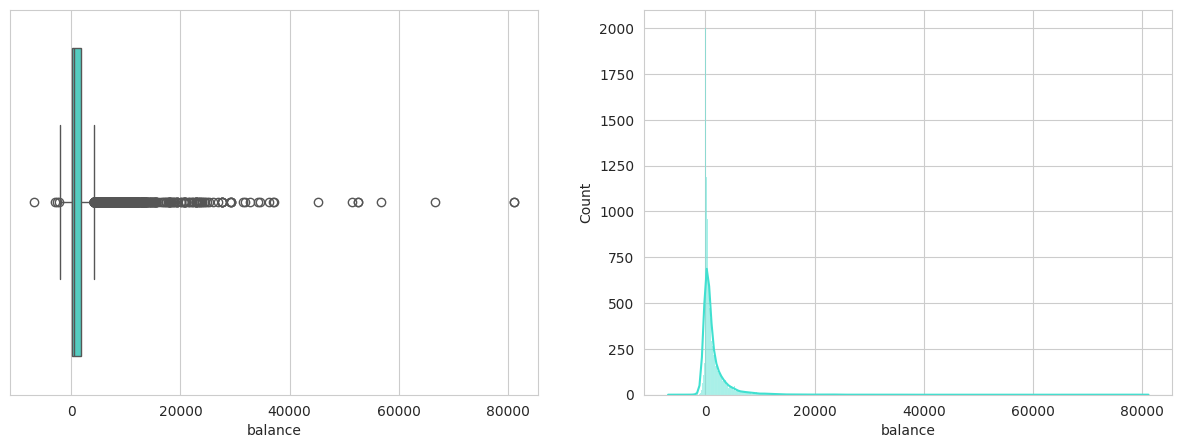

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['balance'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['balance'], kde=True,color='turquoise')

it seems that their is great outlier in column balance

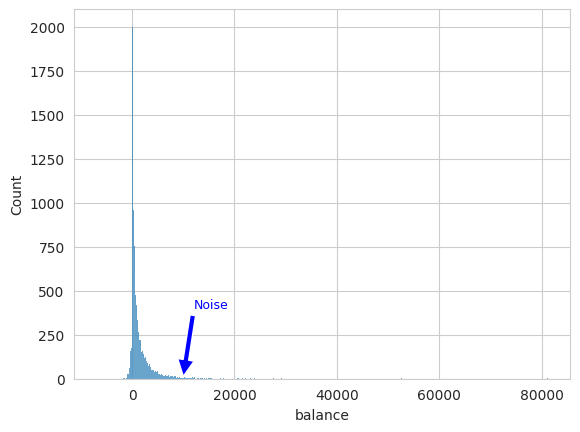

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the 'balance' column without KDE
sns.histplot(df['balance'], kde=False)

# Annotate the point indicating noise
plt.annotate('Noise', xy=(10000, 10), xytext=(12000, 400), color='blue', fontsize=9,
             arrowprops=dict(facecolor='blue', shrink=0.01))

# Show the plot
plt.show()


The bank balances are positively skewed, with most clients having less than 10,000  and some having a lot more , most are 0

#### Categorising balance

In [ ]:
min_balance = df['balance'].min()
min_balance

-6847

In [ ]:
df['balance'].describe()

count    11156.000000
mean      1527.102098
std       3221.830685
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1707.250000
max      81204.000000
Name: balance, dtype: float64

In [ ]:
import pandas as pd

# Define bin edges and labels
bin_edges = [-6850, 0, 122, 81204, float('inf')]  # Define the bin edges
bin_labels = ['Negative', 'Low', 'Medium', 'High']  # Define the corresponding labels

# Create a new column 'balance_range' by categorizing 'balance'
df['balance_range'] = pd.cut(df['balance'], bins=bin_edges, labels=bin_labels)

# Display the value counts of the new column
print(df['balance_range'].value_counts().sum())



11156


In [ ]:
print(df[df['balance'] < -6850])


Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit, balance_range]
Index: []


In [ ]:
df.shape

(11156, 18)

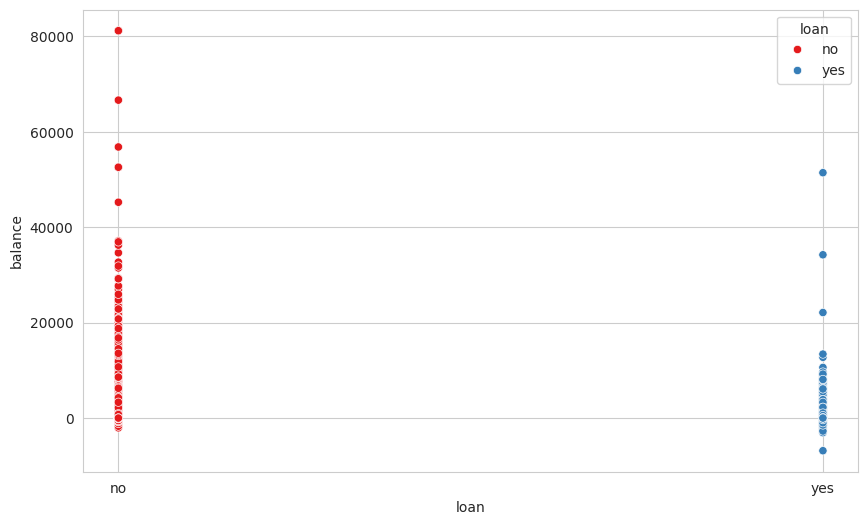

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan', y='balance', hue='loan', data=df, palette='Set1')

plt.xlabel('loan')
plt.ylabel('balance')
plt.legend(title='loan')
plt.show()

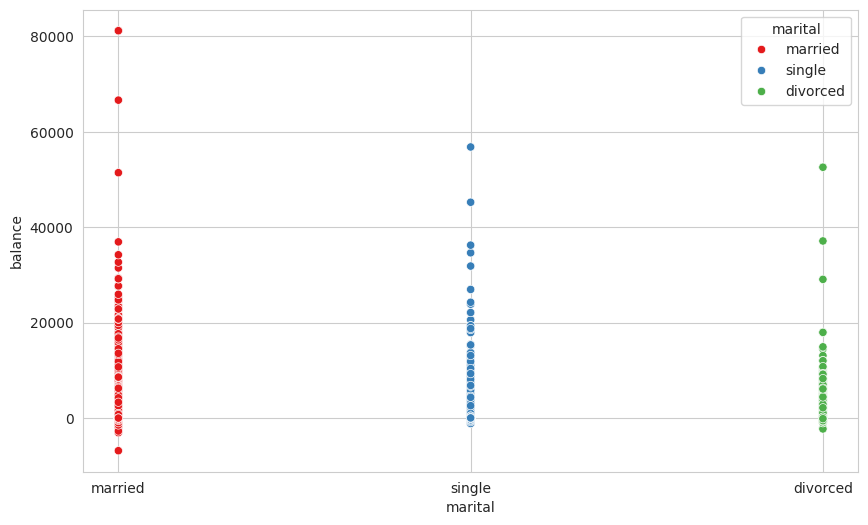

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='marital', y='balance', hue='marital', data=df, palette='Set1')

plt.xlabel('marital')
plt.ylabel('balance')
plt.legend(title='marital')
plt.show()

marital and loan have great impact on balance

### housing

In [ ]:
df['housing'].value_counts()/df['housing'].shape[0]*100

no     52.662245
yes    47.337755
Name: housing, dtype: float64

<Axes: xlabel='housing', ylabel='Count'>

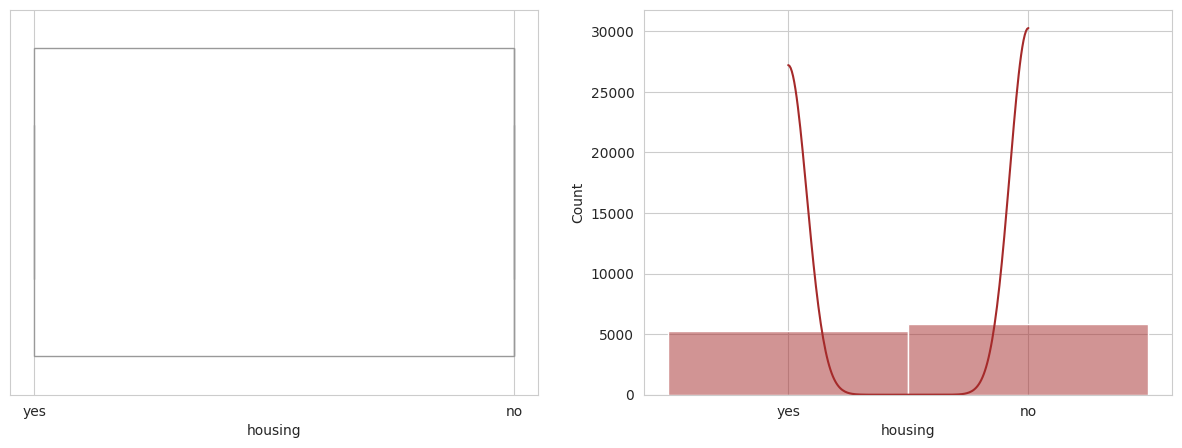

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['housing'],color='white')
plt.subplot(1,2,2)
sns.histplot(x = df['housing'], kde=True,color='brown')

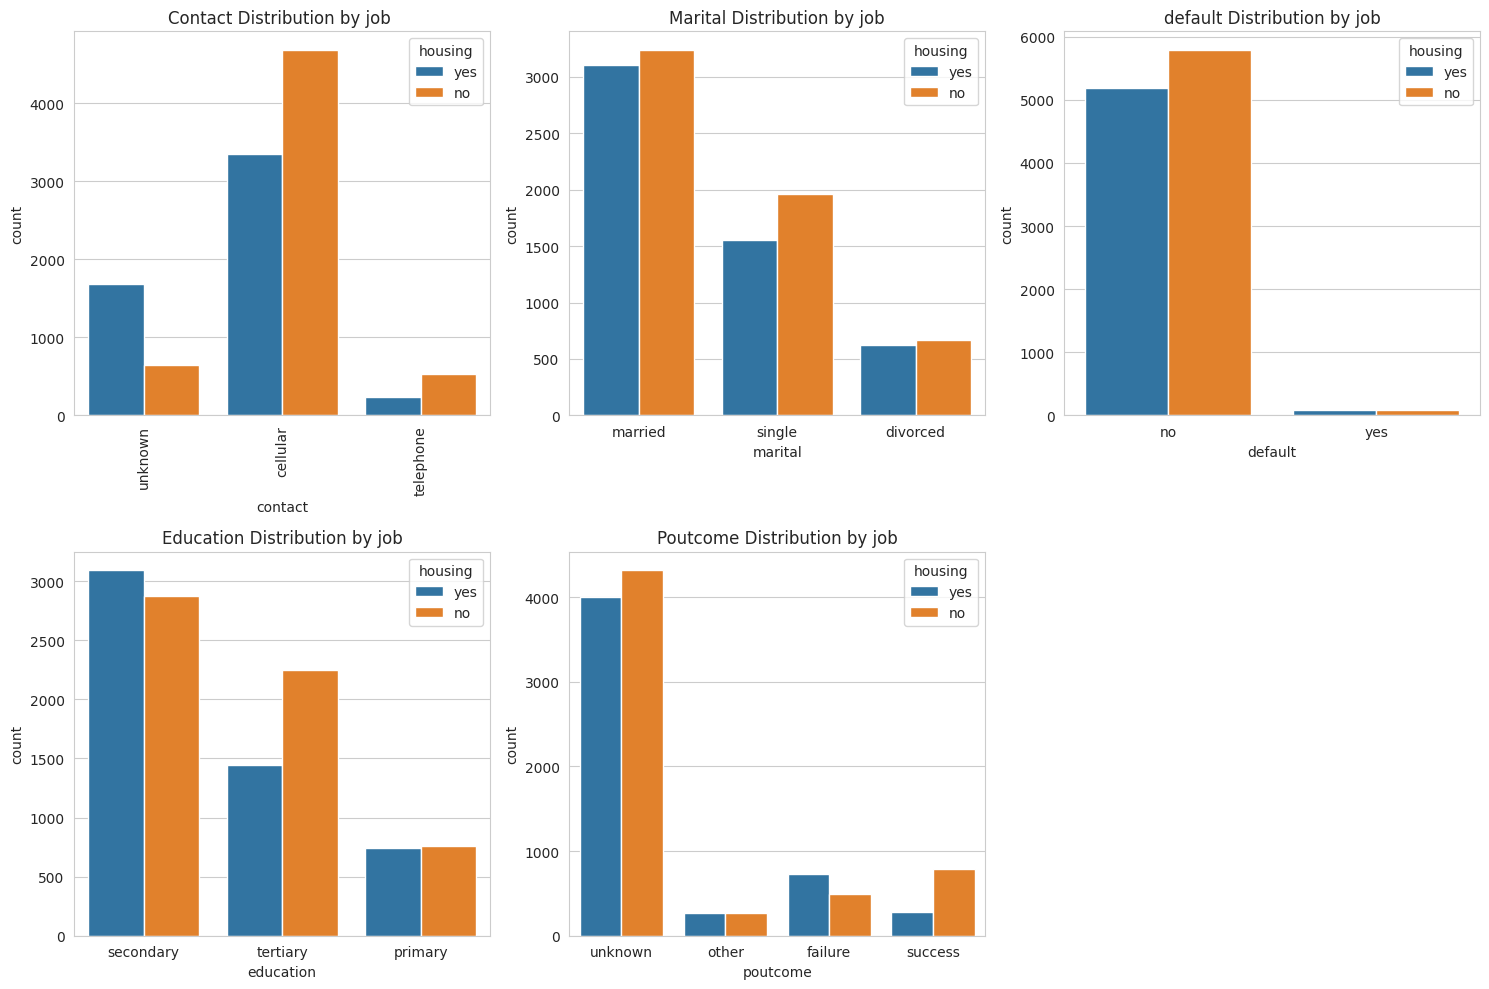

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot count plots for each feature grouped by 'job'
sns.countplot(x='contact', hue='housing', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Contact Distribution by job ')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.countplot(x='marital', hue='housing', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Marital Distribution by job')

sns.countplot(x='default', hue ='housing',data = df , ax=axes[0,2])
axes[0, 2].set_title('default Distribution by job')

sns.countplot(x='education', hue='housing', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution by job')

sns.countplot(x='poutcome', hue='housing', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Poutcome Distribution by job')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

most housing loans are cellular , married , default cc , have secondary education ,and poutcome is unknown

### loan

In [ ]:
df['loan'].value_counts()/df['loan'].shape[0]*100

no     86.912872
yes    13.087128
Name: loan, dtype: float64

<Axes: xlabel='loan', ylabel='Count'>

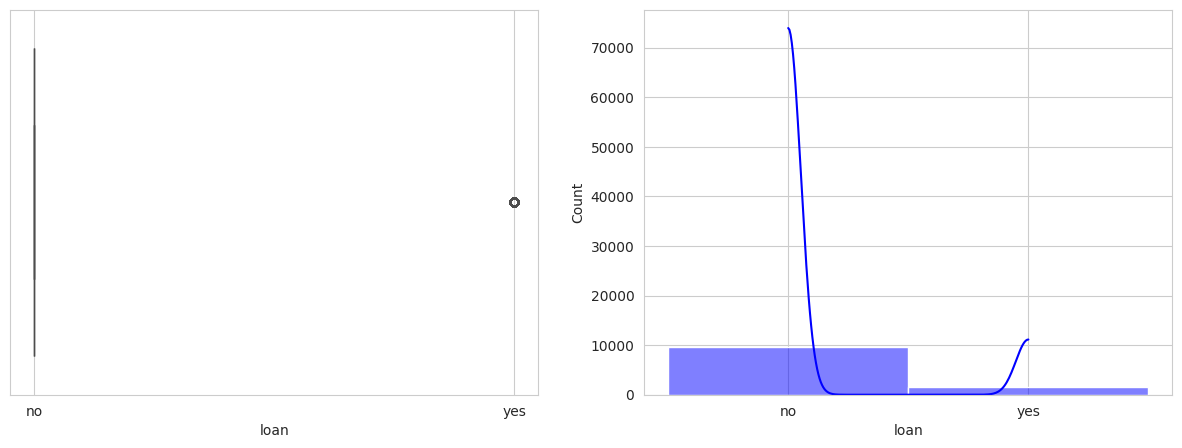

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['loan'],color='blue')
plt.subplot(1,2,2)
sns.histplot(x = df['loan'], kde=True,color='blue')

<Axes: xlabel='loan', ylabel='balance'>

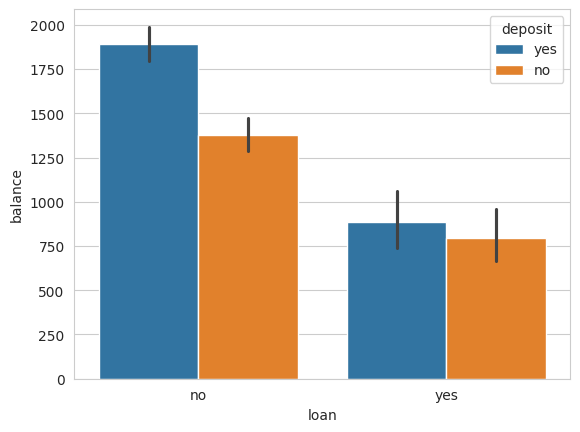

In [ ]:
sns.barplot(x="loan", y="balance", hue="deposit", data=df)

### pdays

In [ ]:
df['pdays'].value_counts()/df['pdays'].shape[0]*100

-1      74.560774
 92      0.950161
 182     0.797777
 91      0.752958
 181     0.726067
          ...    
 437     0.008964
 728     0.008964
 518     0.008964
 828     0.008964
 118     0.008964
Name: pdays, Length: 472, dtype: float64

more than 74% of the data are never contacted before

In [ ]:
df[['pdays']].describe().T

count       mean         std  min  25%  50%    75%    max
pdays  11156.0  51.358551  108.780754 -1.0 -1.0 -1.0  21.25  854.0

-1 may stands for never contacted before and it is the mean
lets chech for outliers

<Axes: xlabel='pdays', ylabel='Count'>

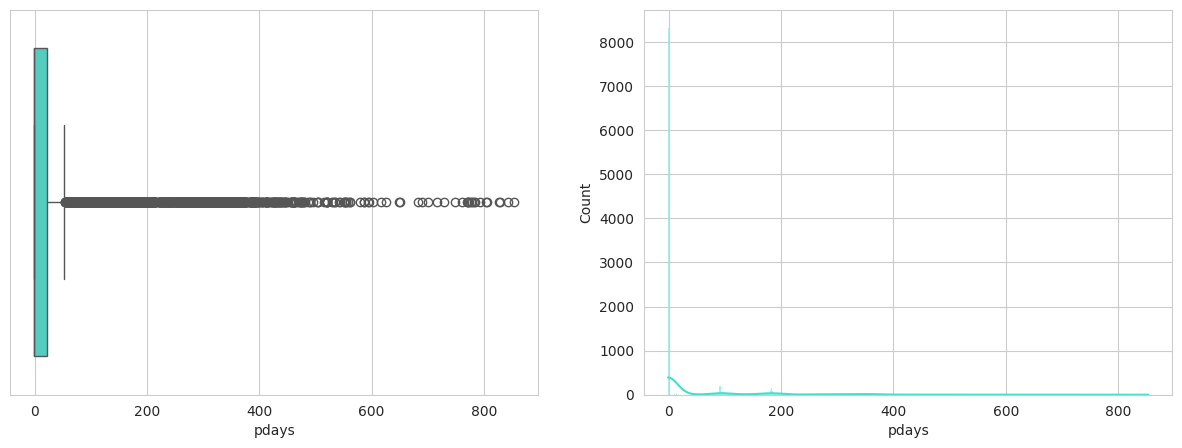

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['pdays'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['pdays'], kde=True,color='turquoise')

In [ ]:
df['pdays'].value_counts()/df['pdays'].shape[0]*100

-1      74.560774
 92      0.950161
 182     0.797777
 91      0.752958
 181     0.726067
          ...    
 437     0.008964
 728     0.008964
 518     0.008964
 828     0.008964
 118     0.008964
Name: pdays, Length: 472, dtype: float64

In [ ]:
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2011473646468267

will replace values which are > 400 with the mean in pdays

### campaign

In [ ]:
df['campaign'].value_counts()/df['campaign'].shape[0]*100

1     42.981355
2     27.133381
3     11.832198
4      6.911079
5      3.388311
6      2.375403
7      1.245966
8      1.138401
9      0.645393
10     0.466117
11     0.358551
13     0.268914
12     0.259950
14     0.134457
17     0.125493
15     0.116529
16     0.080674
18     0.071710
21     0.071710
20     0.044819
19     0.044819
24     0.044819
22     0.035855
30     0.035855
23     0.026891
25     0.026891
26     0.026891
32     0.017928
43     0.017928
29     0.017928
33     0.008964
28     0.008964
41     0.008964
27     0.008964
63     0.008964
31     0.008964
Name: campaign, dtype: float64

In [ ]:
df[['campaign']].describe().T


count      mean       std  min  25%  50%  75%   max
campaign  11156.0  2.508336  2.722192  1.0  1.0  2.0  3.0  63.0

<Axes: xlabel='campaign', ylabel='Count'>

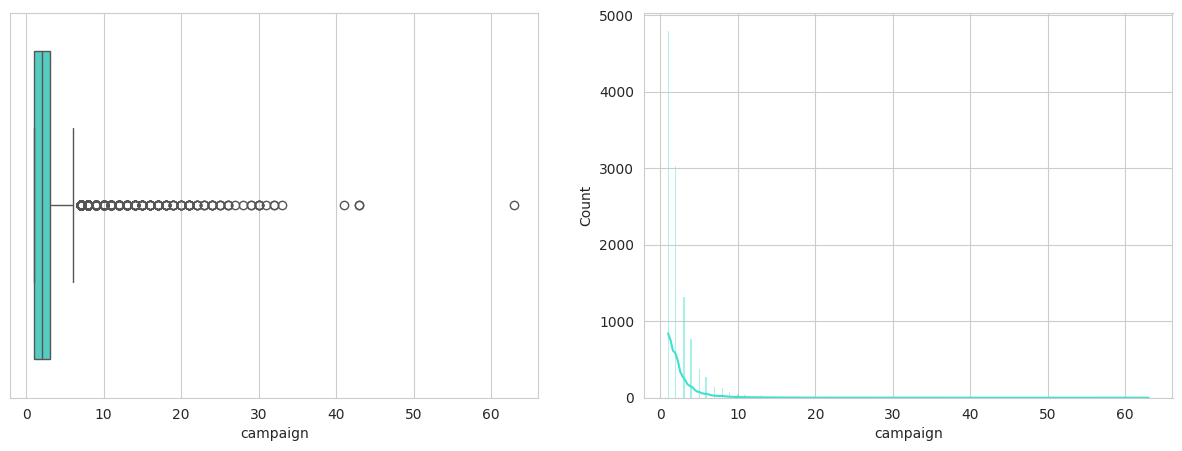

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['campaign'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['campaign'], kde=True,color='turquoise')

In [ ]:
len (df[df['campaign'] > 20] ) / len(df) * 100


0.3764790247400502

will replace values greater than 20 in the 'campaign' column with the average of the 'campaign' column

### previous

In [ ]:
df[['previous']].describe().T


count      mean       std  min  25%  50%  75%   max
previous  11156.0  0.833005  2.292542  0.0  0.0  0.0  1.0  58.0

In [ ]:
df['previous'].value_counts()/df['previous'].shape[0]*100

0     74.560774
1      7.950878
2      6.211904
3      3.899247
4      2.187164
5      1.479025
6      1.048763
7      0.690212
8      0.537827
9      0.304769
10     0.268914
11     0.206167
12     0.143421
13     0.098602
17     0.098602
14     0.053783
15     0.044819
19     0.035855
16     0.017928
20     0.017928
27     0.017928
23     0.017928
40     0.008964
41     0.008964
28     0.008964
18     0.008964
58     0.008964
55     0.008964
26     0.008964
21     0.008964
22     0.008964
30     0.008964
29     0.008964
37     0.008964
Name: previous, dtype: float64

<Axes: xlabel='previous', ylabel='Count'>

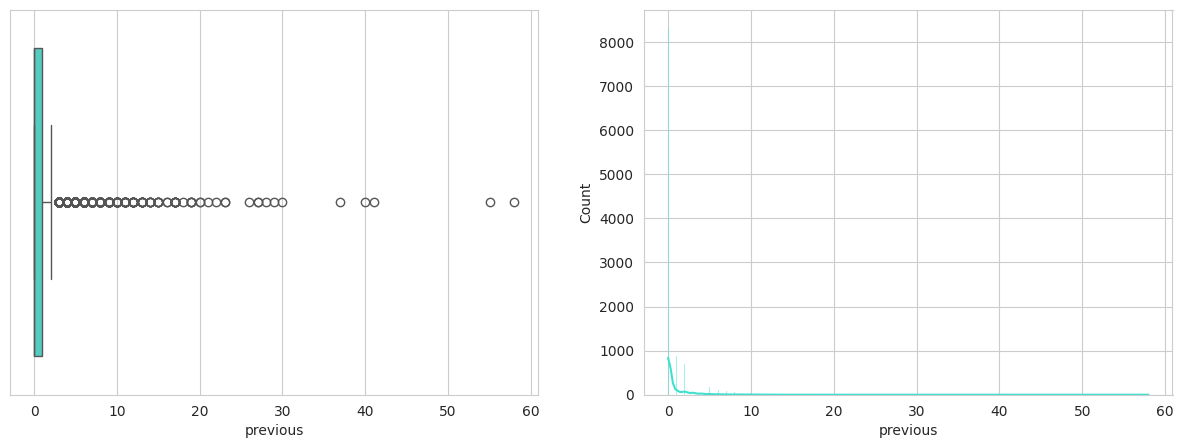

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['previous'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['previous'], kde=True,color='turquoise')

In [ ]:
len (df[df['previous'] > 20] ) / len(df) * 100


0.13445679455001794

previous Number of contacts performed before this campaign for this individual.
it is so wierd to call someone more than 20 times for a campain so will consider more than 10 is an outlier

### deposit

In [ ]:
df['deposit'].value_counts()

no     5868
yes    5288
Name: deposit, dtype: int64

<Axes: ylabel='deposit'>

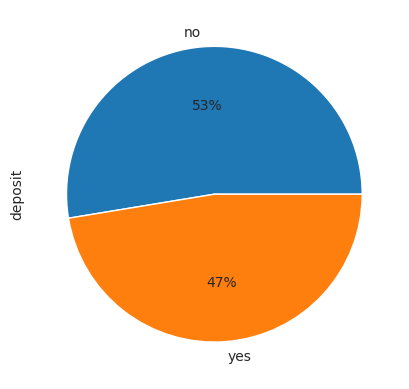

In [ ]:
df["deposit"].value_counts().plot.pie(autopct='%1.f%%')

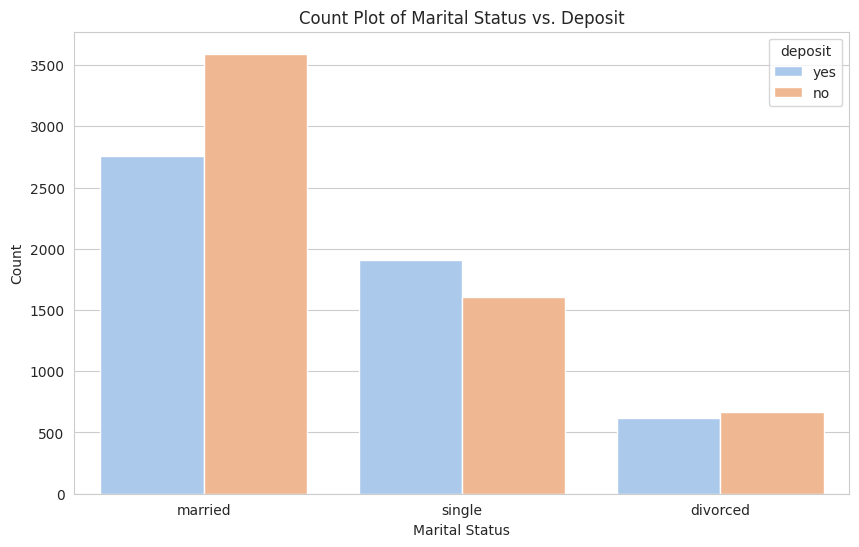

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='deposit', data=df, palette='pastel')
plt.title('Count Plot of Marital Status vs. Deposit')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

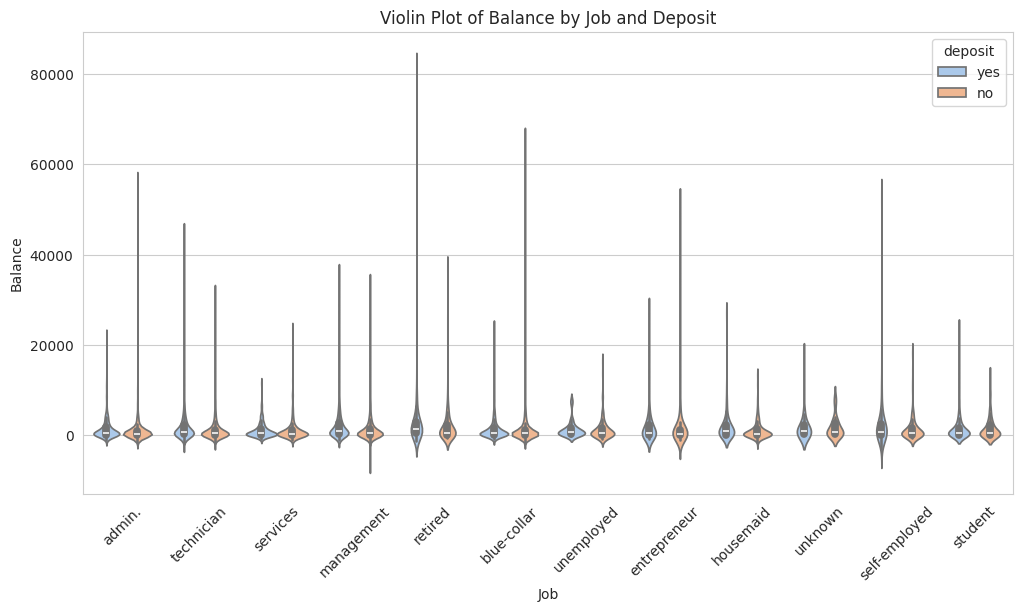

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='job', y='balance', hue='deposit', data=df, palette='pastel')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.title('Violin Plot of Balance by Job and Deposit')
plt.show()

<Axes: xlabel='education', ylabel='balance'>

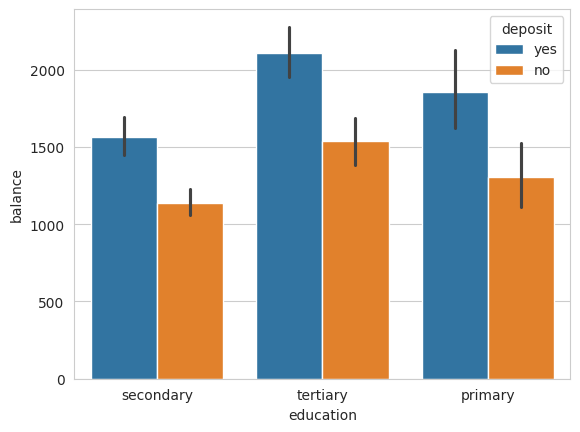

In [ ]:
sns.barplot(x="education", y="balance", hue="deposit", data=df)

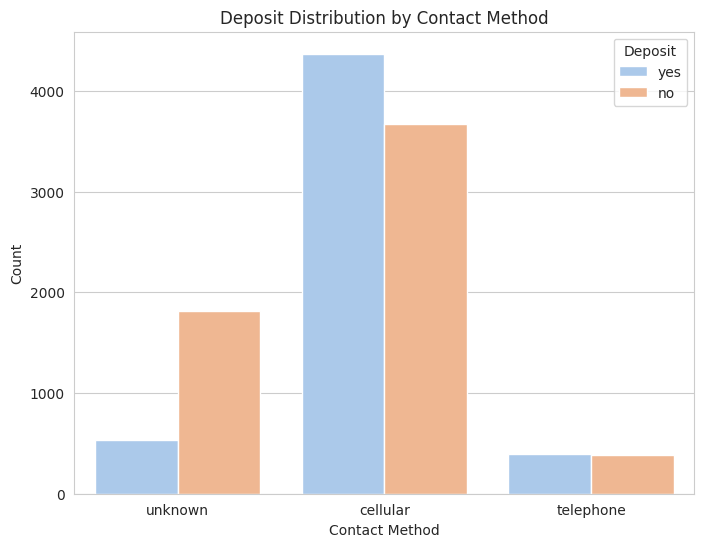

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='deposit', data=df, palette='pastel')
plt.title('Deposit Distribution by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

ppl with jobs blue coller and srvices are least that subscribe to term deposit , marrid and Customers with 'unknown' and 'cellular' type of contact are less likely to subscribe for term deposit


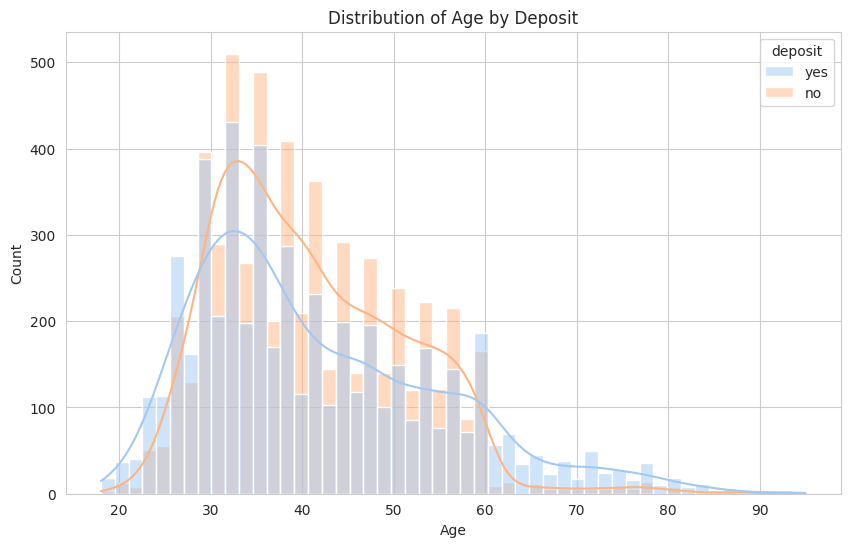

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='deposit', data=df, kde=True, palette='pastel')
plt.title('Distribution of Age by Deposit')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

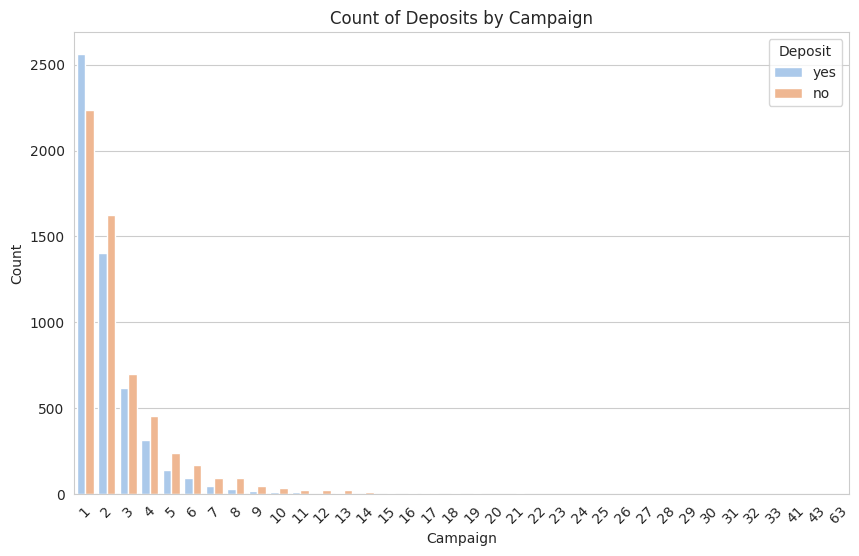

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='campaign', hue='deposit', data=df, palette='pastel')
plt.title('Count of Deposits by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.xticks(rotation=45)
plt.show()

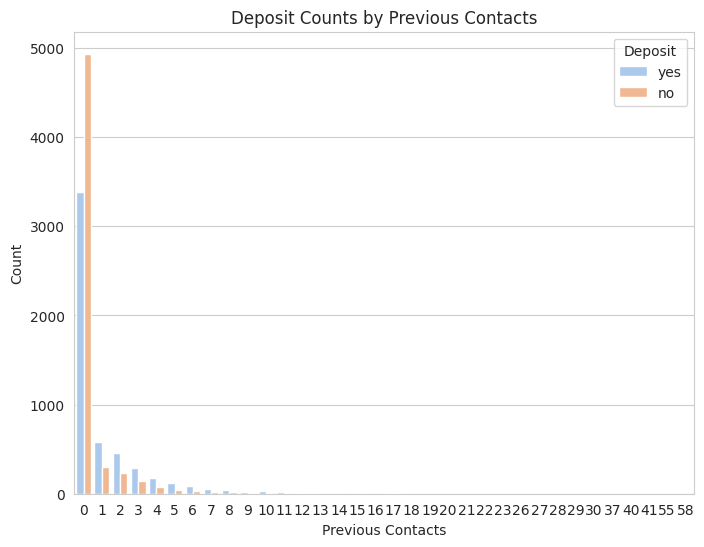

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='previous', hue='deposit', data=df, palette='pastel')
plt.title('Deposit Counts by Previous Contacts')
plt.xlabel('Previous Contacts')
plt.ylabel('Count')
plt.legend(title='Deposit')
plt.show()

People who subscribed for term deposit tend to have greater balance and age values.and mostly retired

also, have fewer number of contacts during this campaign.

### poutcome

In [ ]:
df[['poutcome']].describe().T


count unique      top  freq
poutcome  11156      4  unknown  8320

In [ ]:
df['poutcome'].value_counts()/df['poutcome'].shape[0]*100

unknown    74.578702
failure    11.007530
success     9.600215
other       4.813553
Name: poutcome, dtype: float64

<Axes: xlabel='poutcome', ylabel='balance'>

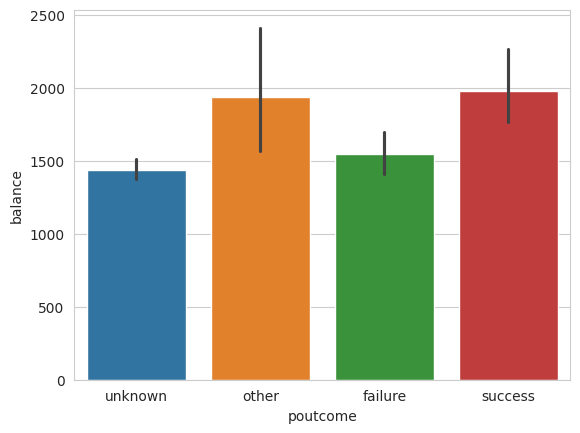

In [ ]:
sns.barplot(x="poutcome", y="balance", hue="poutcome", data=df)

<Axes: xlabel='poutcome', ylabel='Count'>

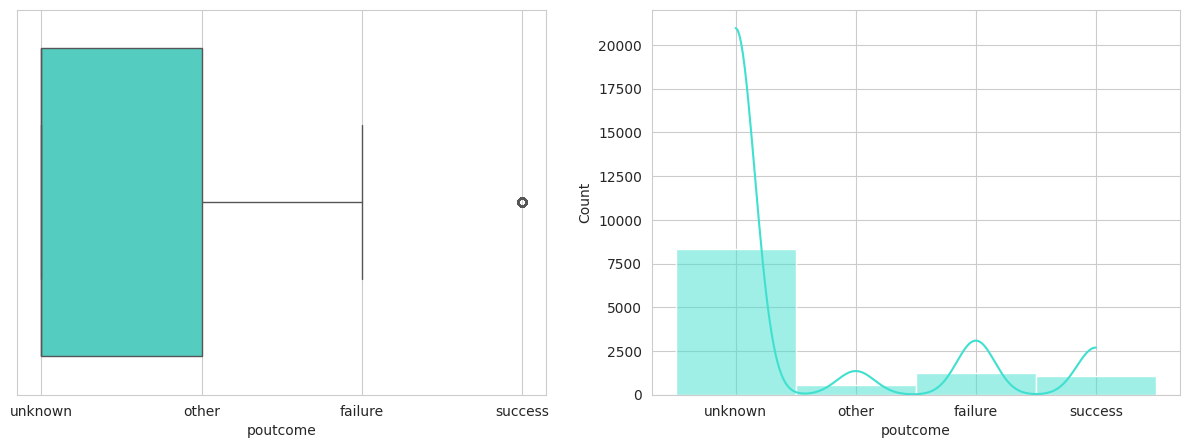

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['poutcome'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['poutcome'], kde=True,color='turquoise')

<Axes: xlabel='poutcome', ylabel='balance'>

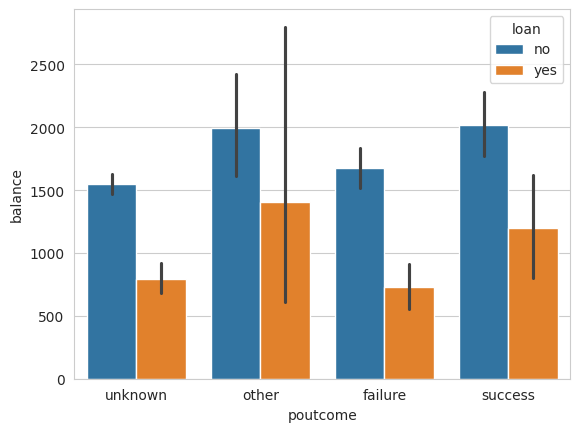

In [ ]:
sns.barplot(x="poutcome", y="balance", hue="loan", data=df)

### month

In [ ]:
df[['month']].describe().T

count unique  top  freq
month  11156     12  may  2823

In [ ]:
df['month'].value_counts()/df['month'].shape[0]*100

may    25.304769
aug    13.615991
jul    13.571172
jun    10.917892
nov     8.452850
apr     8.273575
feb     6.955898
oct     3.504840
jan     3.083542
sep     2.859448
mar     2.474005
dec     0.986016
Name: month, dtype: float64

In [ ]:
fig=px.bar(df.month.value_counts().reset_index().rename(columns={'index':'Month','month':'Count'}),x='Month',y='Count',color='Month',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Last Contact Month of the year',font_family="Times New Roman",title_font_family="Times New Roman")

In [ ]:
a=df.groupby(['month','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('month')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='month',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Deposits based on last Contact month',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()


Most of the clients in the bank are contacted in the months of May, Jun, Jul and in Aug last year.
very few of the clients are contacted in the months of Sep, Mar and in De

### the whole data

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

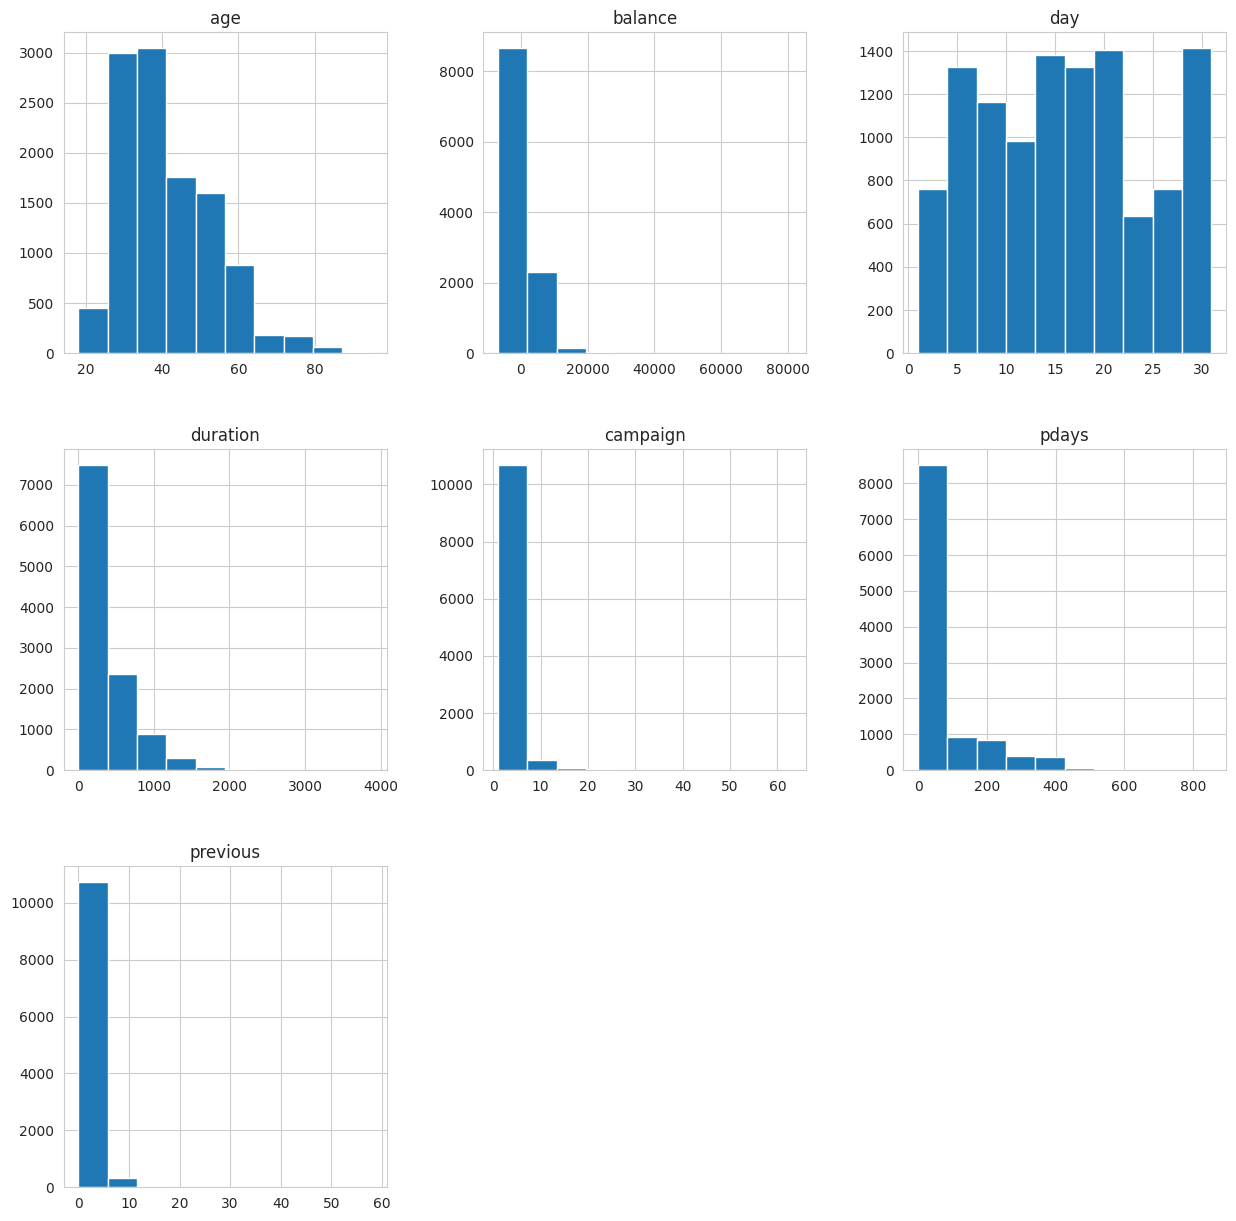

In [ ]:
df.hist(figsize =(15 , 15))



*   right skewness in pdays , campaign , duration , blalence  , previos
*   there might be outliers also in the above mentioned columns



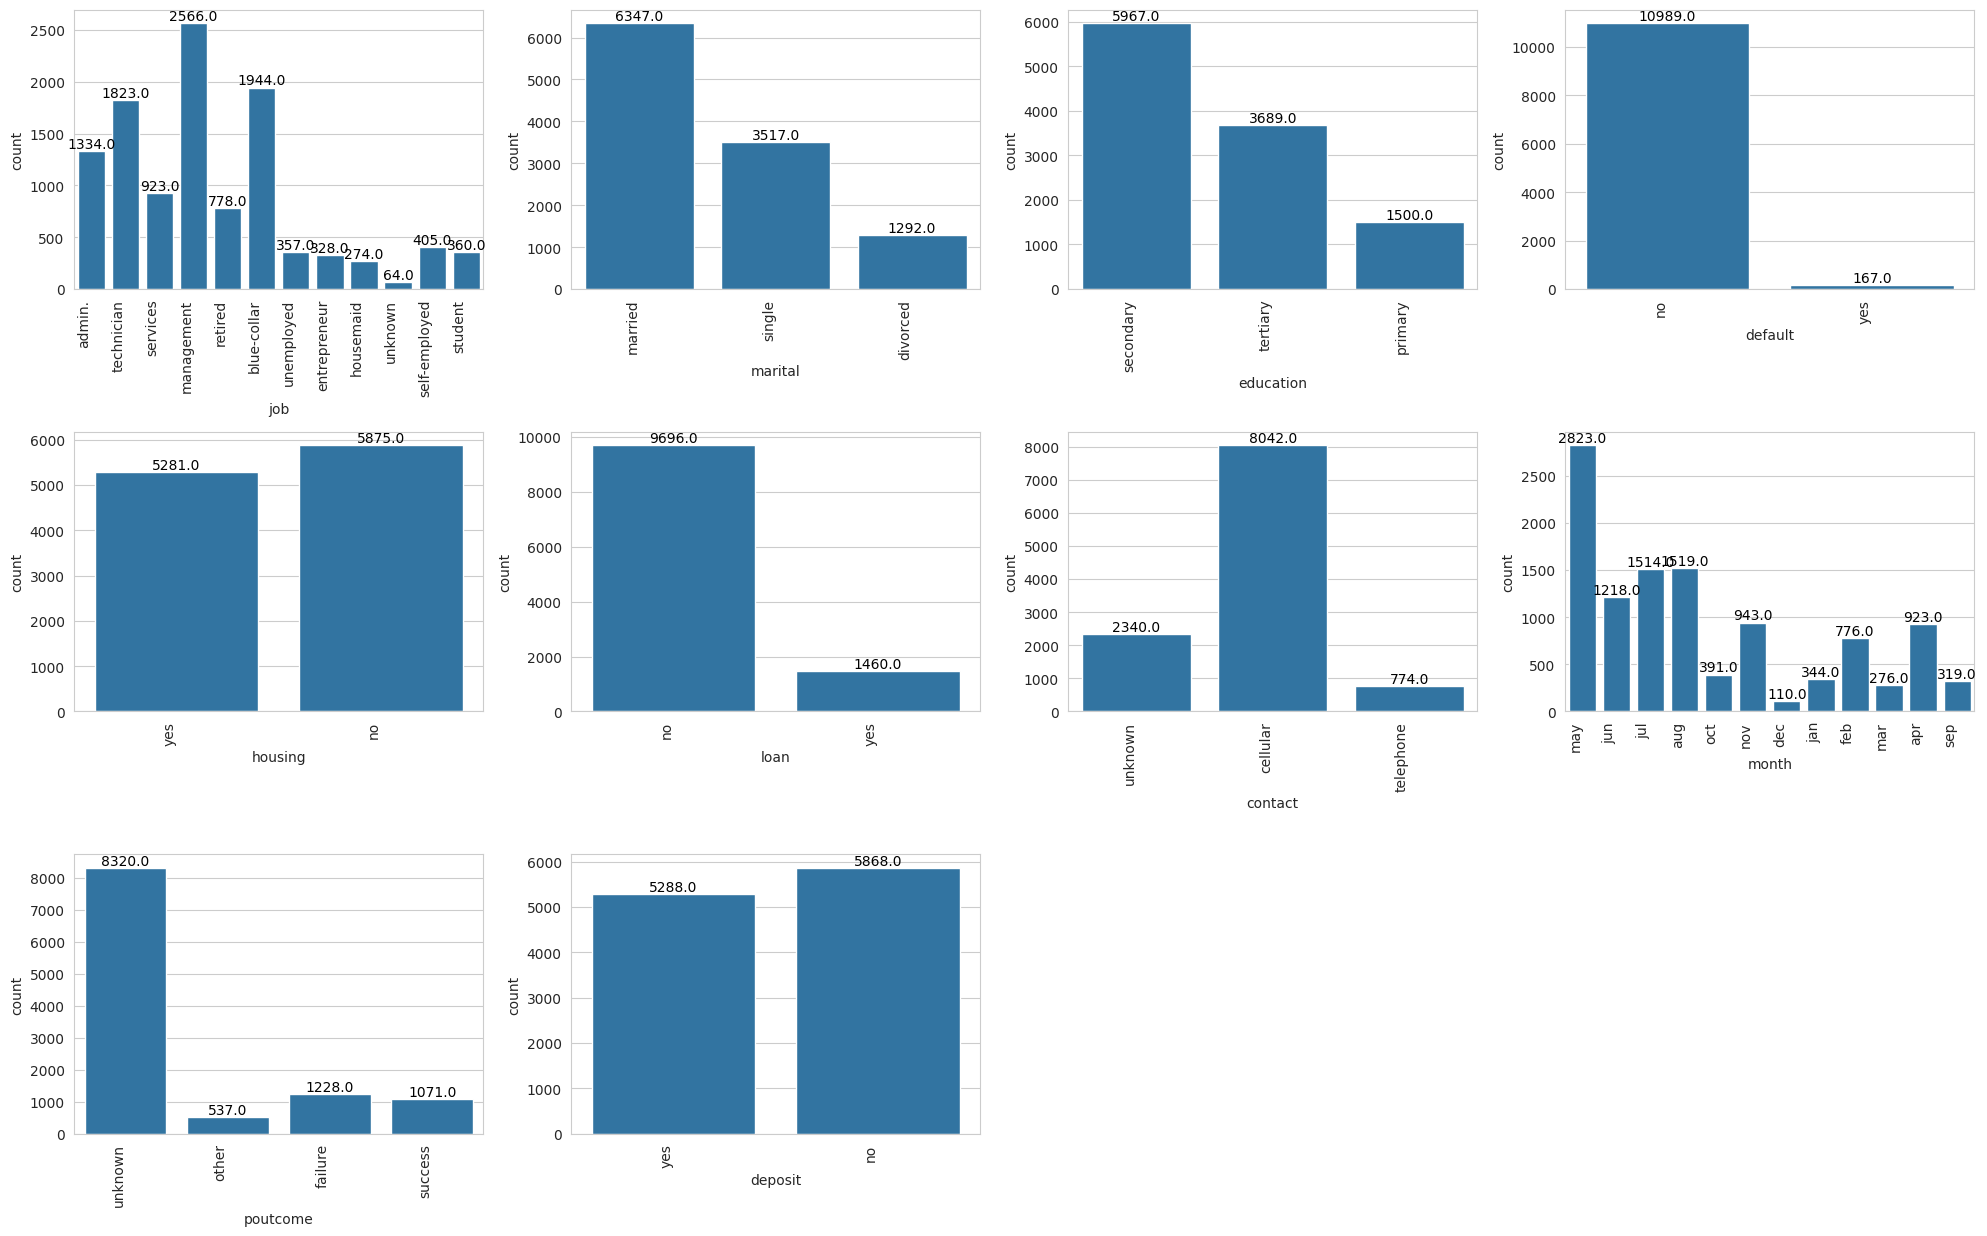

In [ ]:
fig = plt.figure(figsize=(20, 20))
for idx, col in enumerate(categ_cols, 1):
    ax = fig.add_subplot(5, 4, idx)
    sns.countplot(x=df[col], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels

    # Add count values on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

most of the bank's clients are secondry. Most of the clients are married  ,The proportion of clients with and without housing loans is roughly similar, have no credit in default or personal loans(which is logical as the campagin is targetting the ppl that dont have cc)

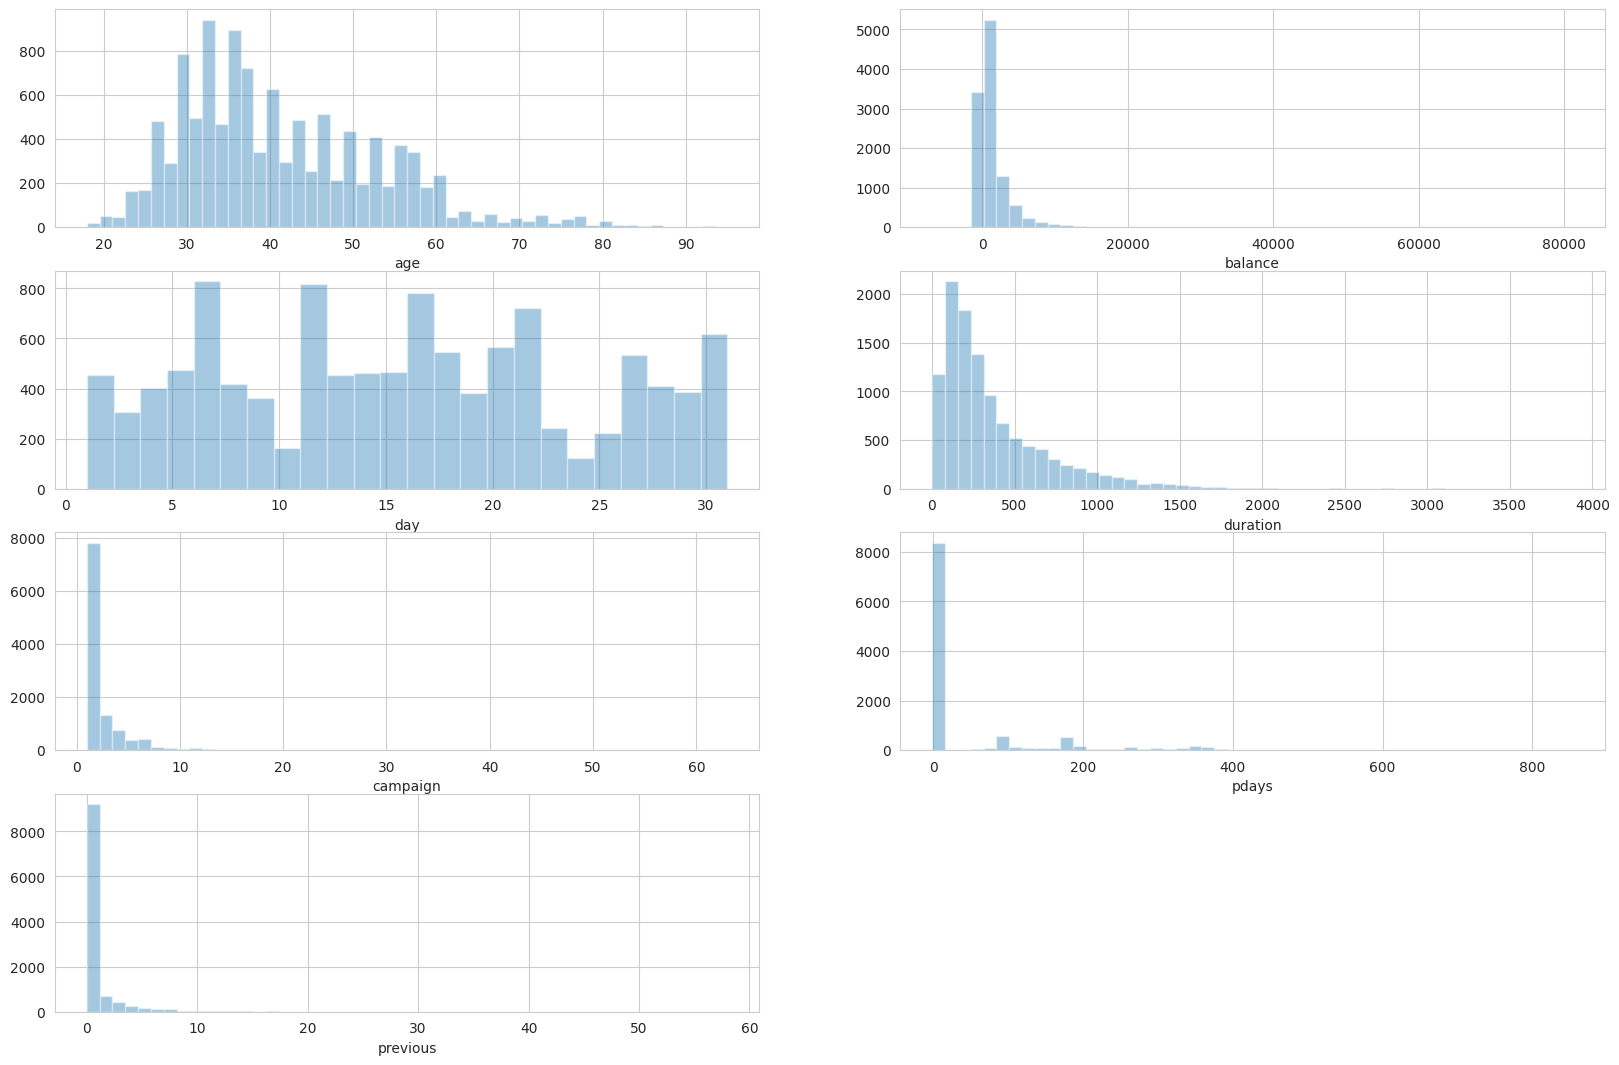

In [ ]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df[num_cols].columns):
    ax = plt.subplot(9, 2, i+1)
    sns.distplot(df[col], ax=ax,kde=False)
    plt.xlabel(col)

plt.show()

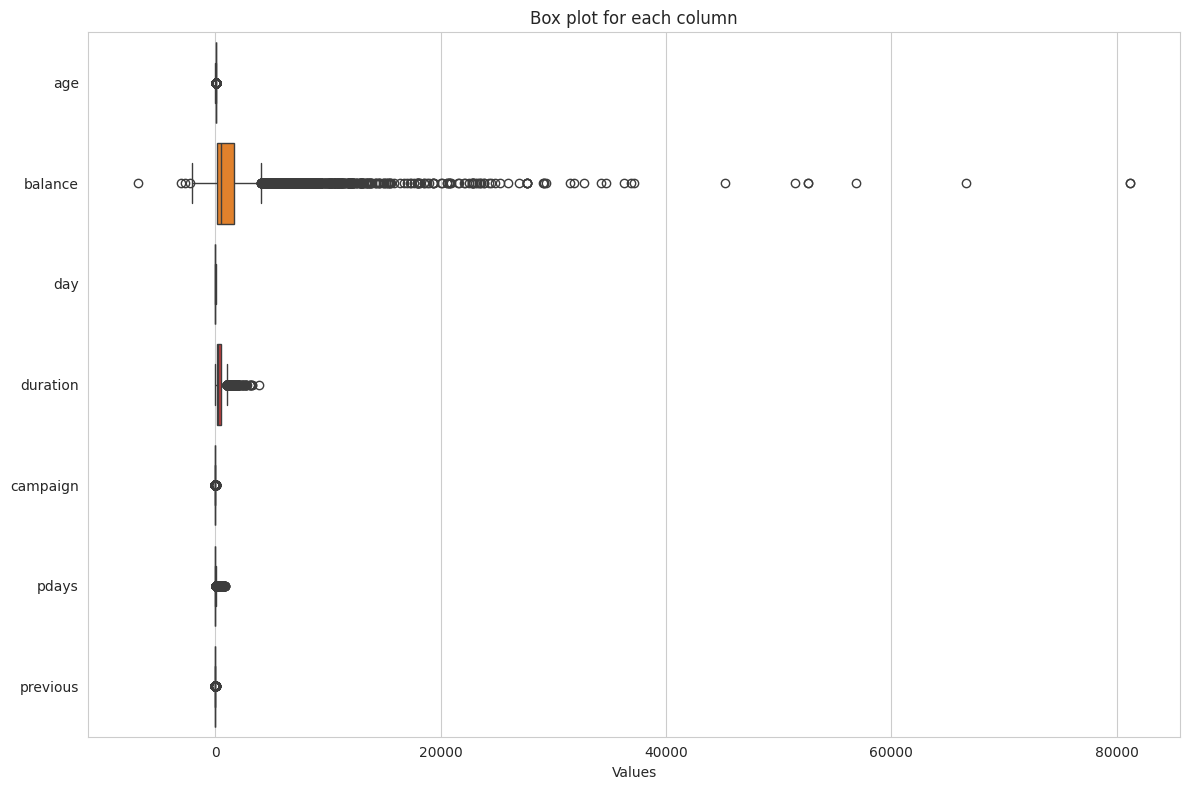

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df, orient='h')
plt.title('Box plot for each column')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

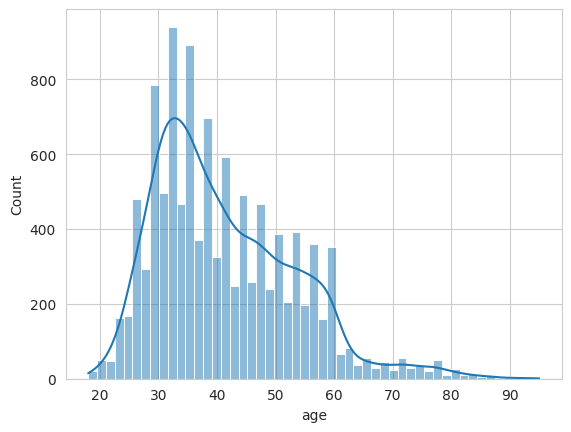

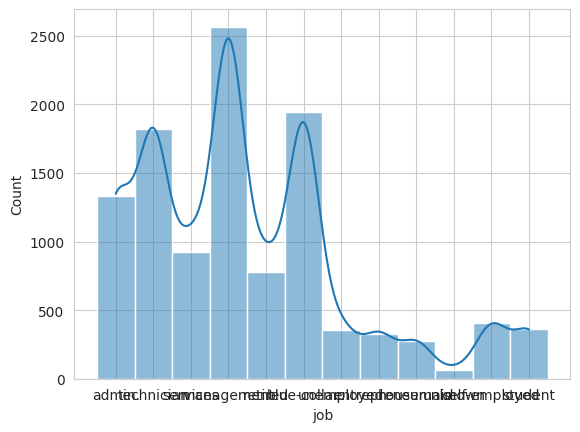

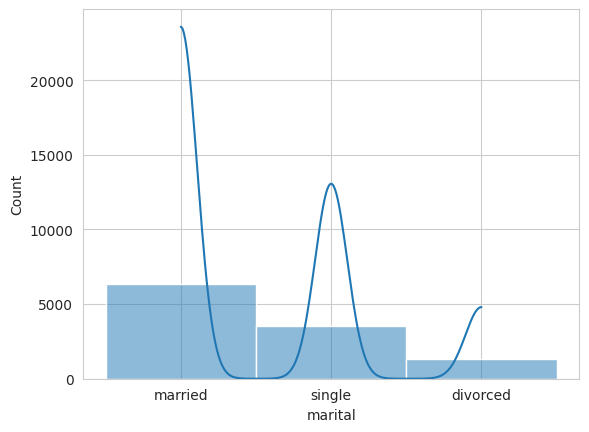

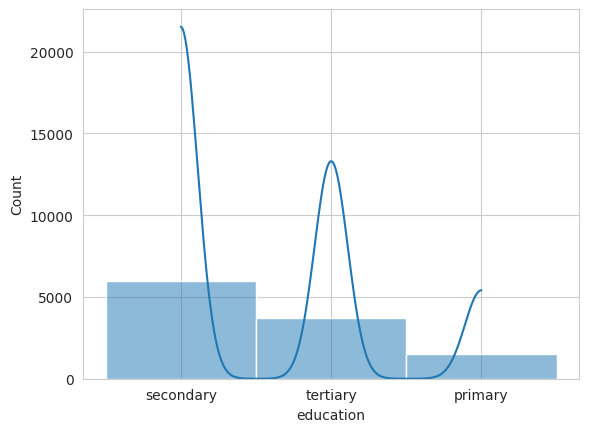

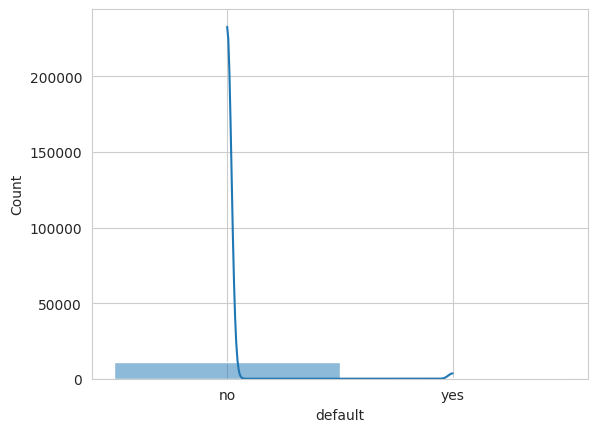

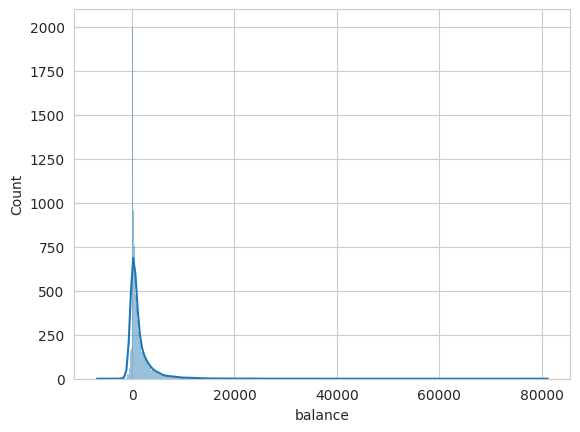

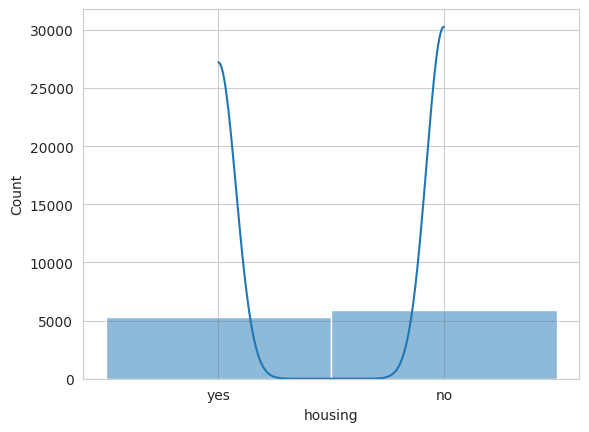

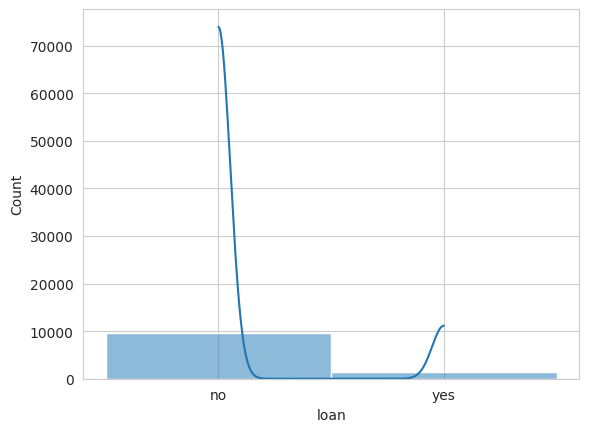

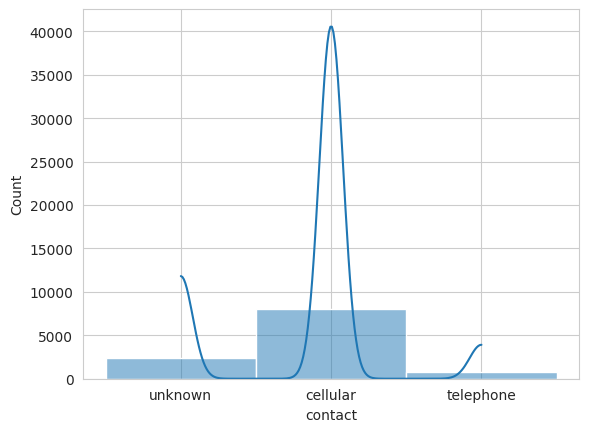

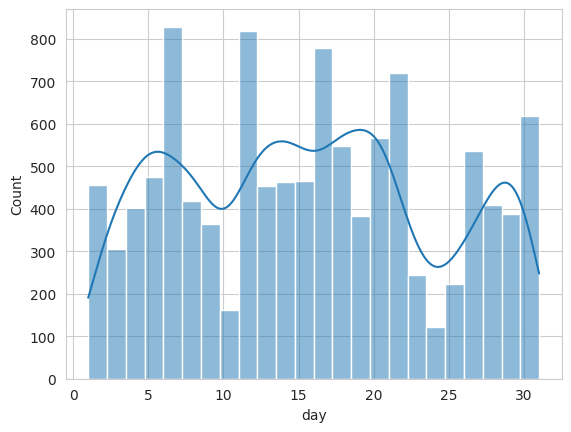

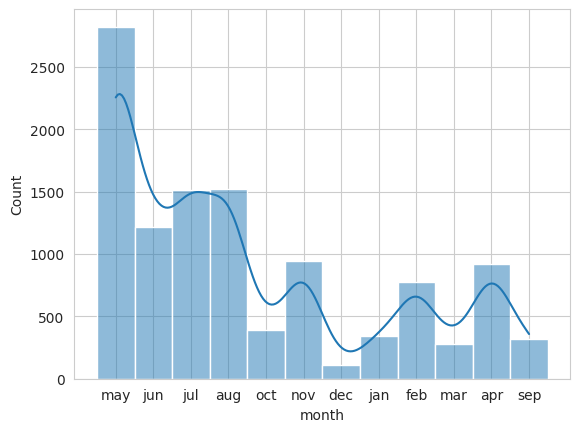

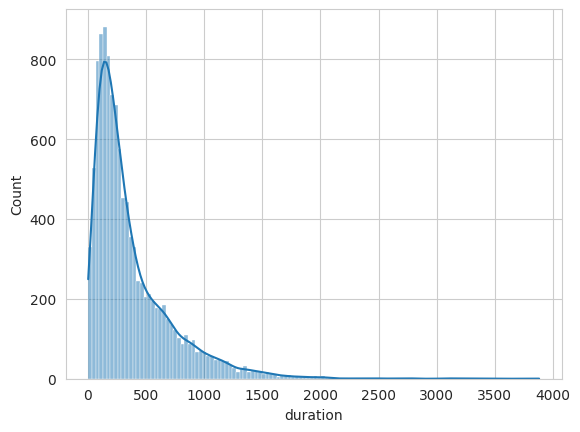

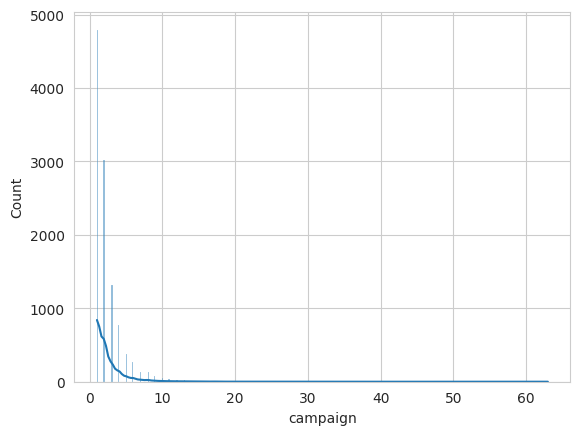

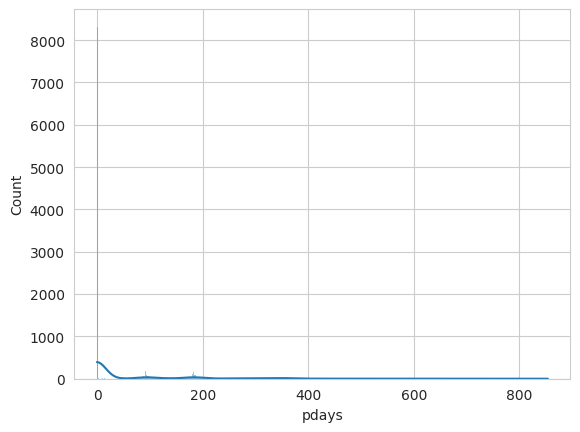

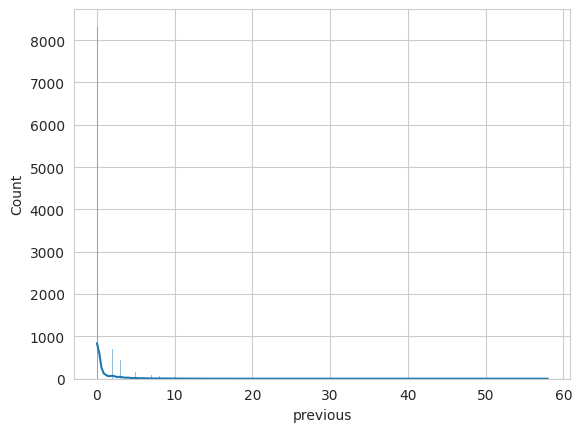

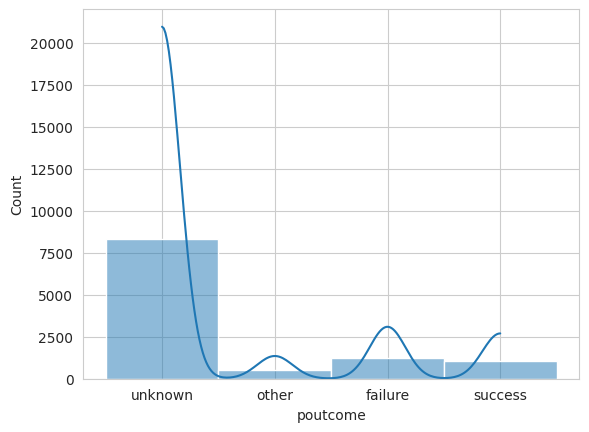

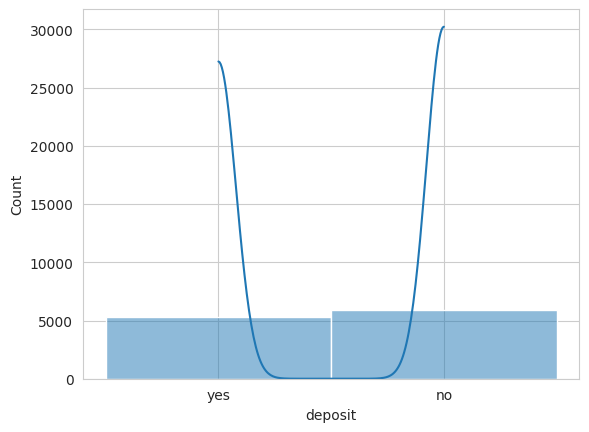

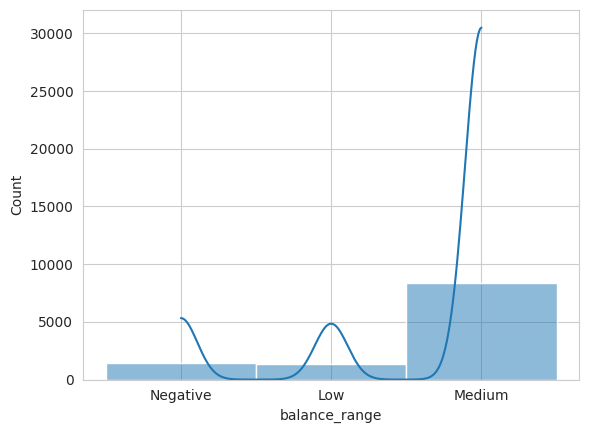

In [ ]:
# Checking distribution of columns which have outliers
for col in df.columns:
    sns.histplot(x = df[col], kde=True)
    plt.show()

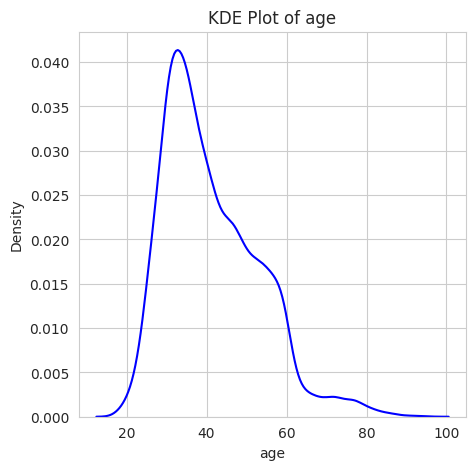

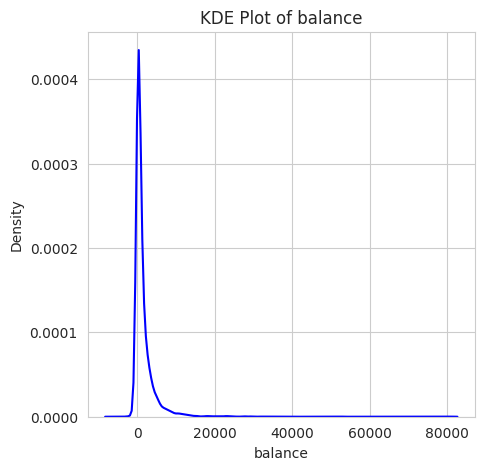

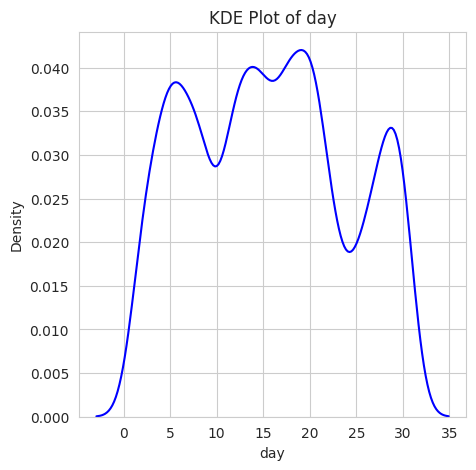

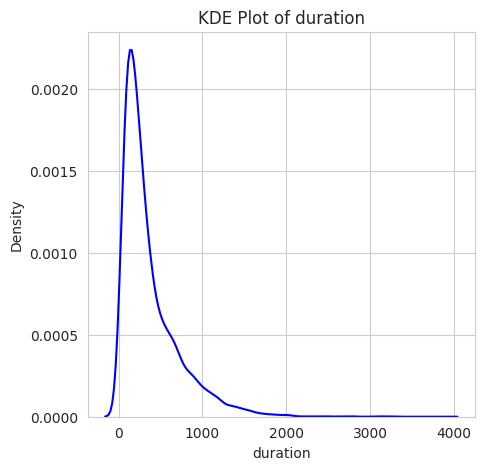

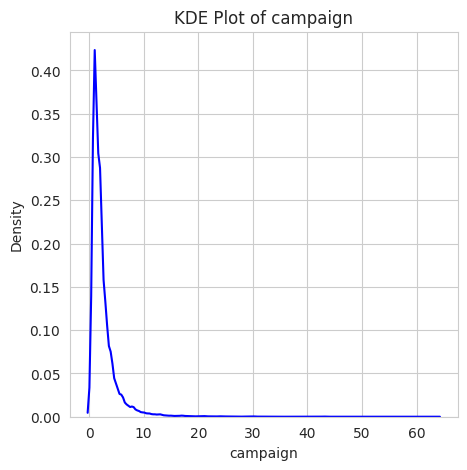

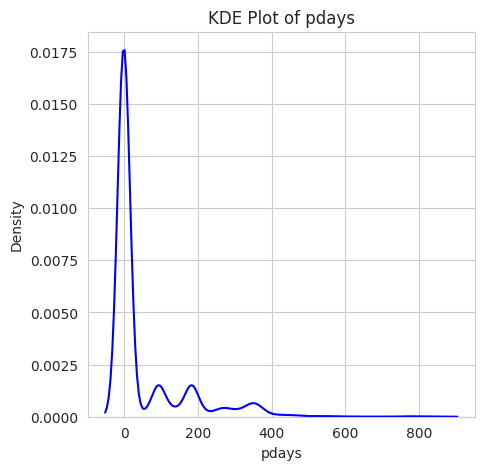

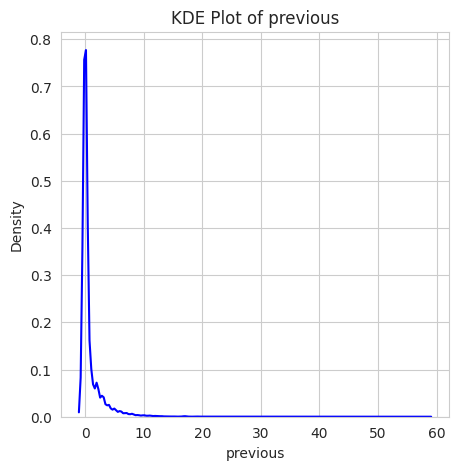

In [ ]:
# Filter numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Plot KDE for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(5, 5))
    sns.kdeplot(data=df, x=col, color='blue')
    plt.title(f'KDE Plot of {col}')
    plt.show()
    print("\n")

.Skewness measures the asymmetry of the data distribution. Negative skewness indicates a left-skewed distribution(no -ve skewness in this data only +ve)
.Kurtosis (bt2iis el peak of freq dist)measures the tailedness of the data distribution. Negative kurtosis suggests a distribution with lighter tails than a normal distribution.(day)

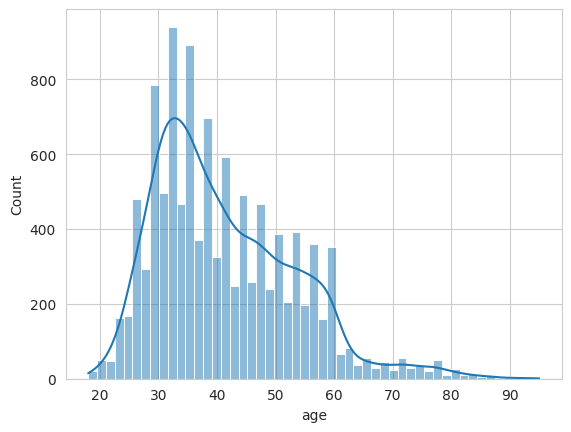

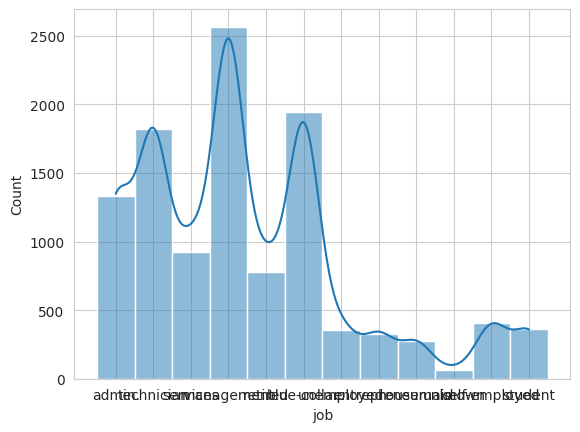

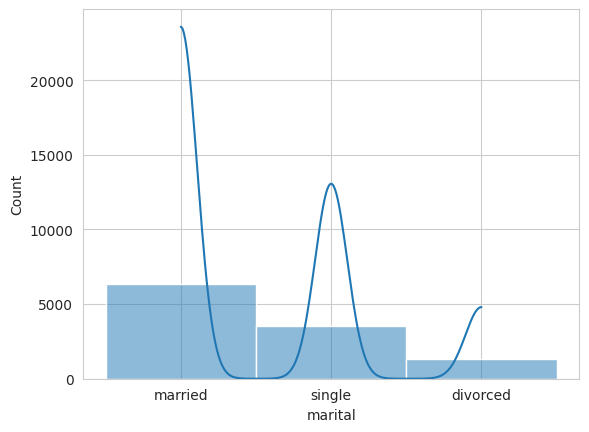

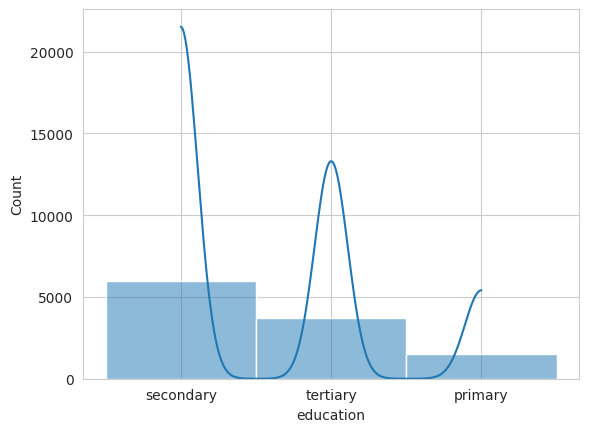

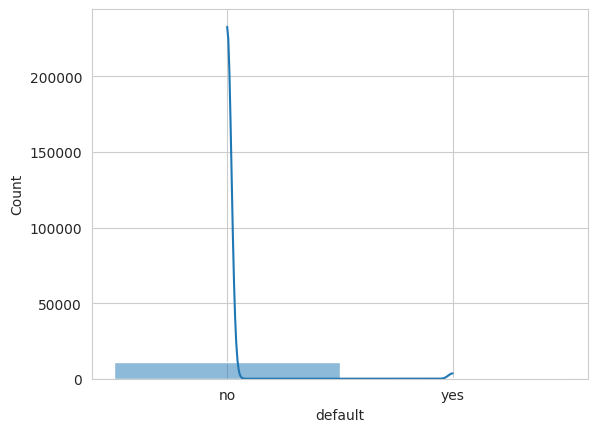

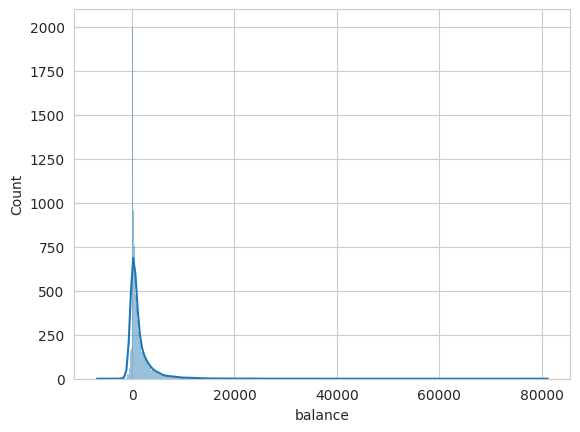

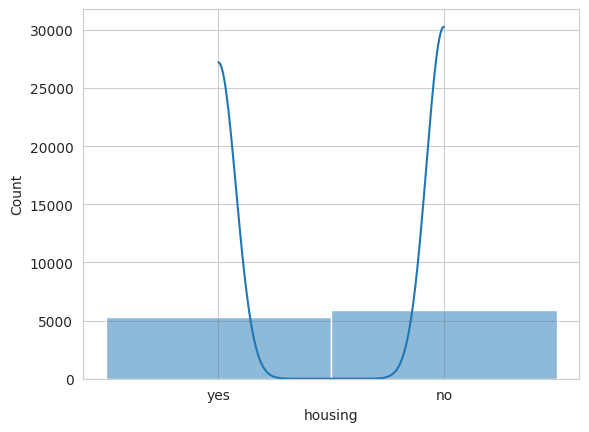

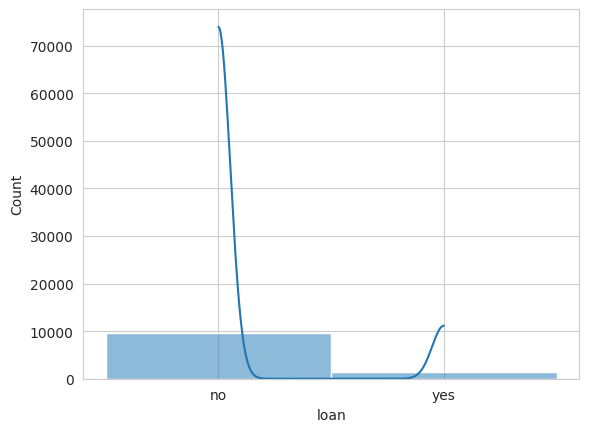

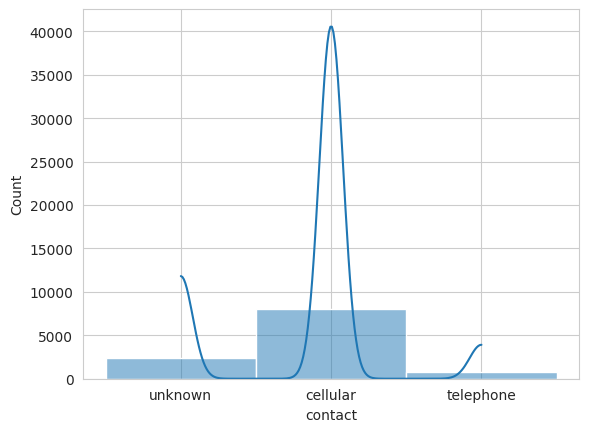

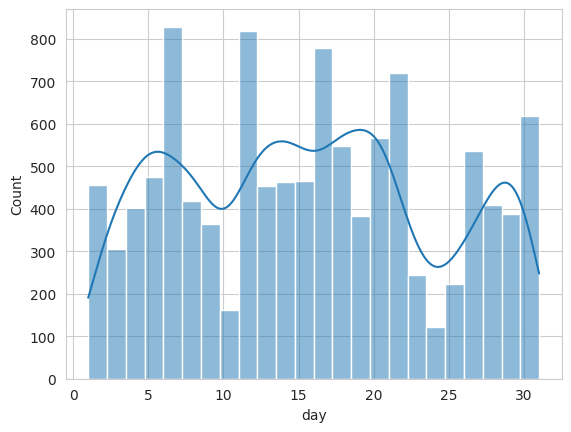

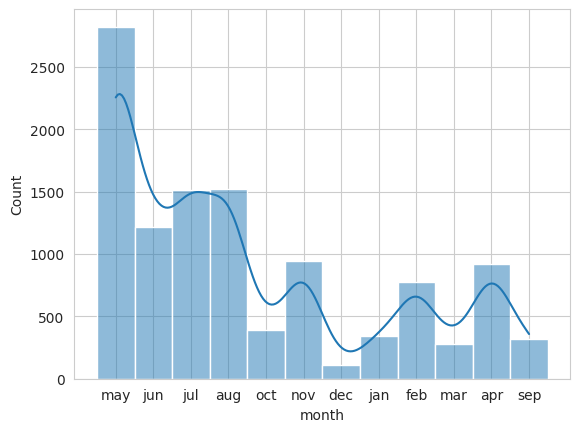

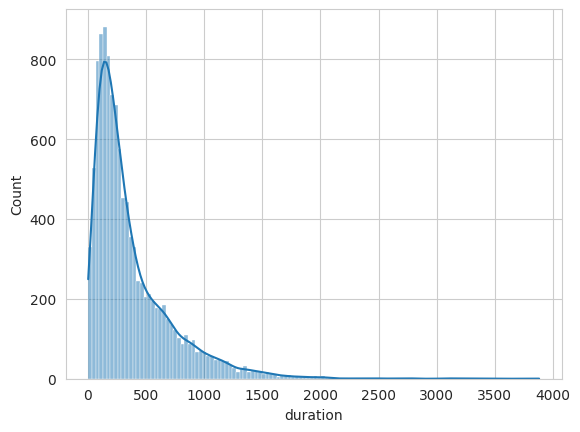

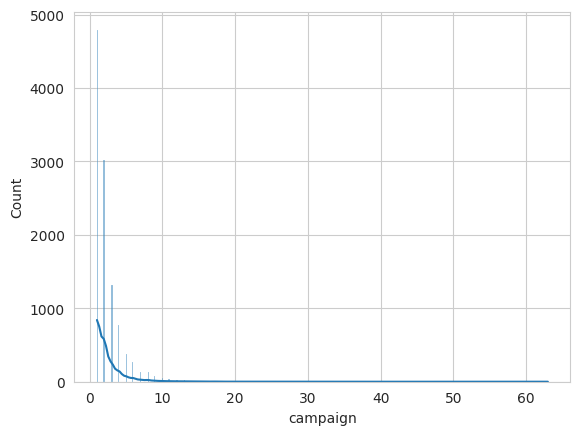

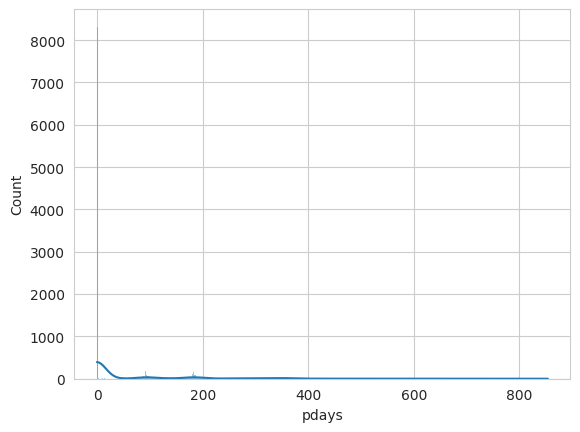

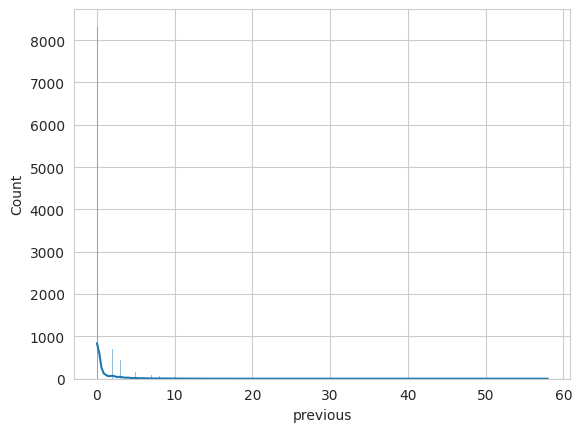

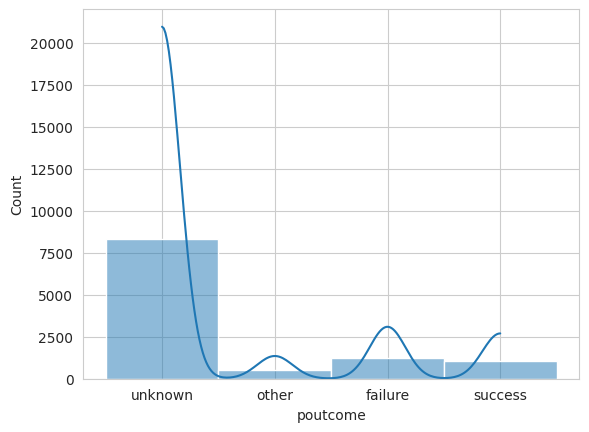

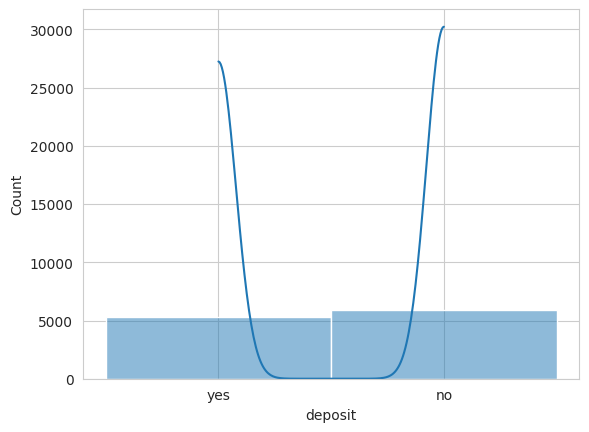

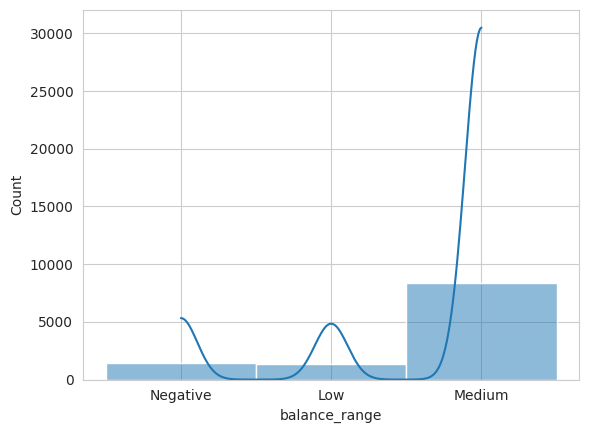

In [ ]:
# Checking distribution of columns which have outliers
for col in df.columns:
    sns.histplot(x = df[col], kde=True)
    plt.show()

from whole of the above we concluded
* colums el cont pday , balance
* columns categorical contact , poutcome , marital , education
* columns boolean default , loan , housing , deposit

* no missing value in the dataset.
* no duplicates in the dataset.
* outliers at pdays previos and campagin.


In [ ]:
statistics = df.describe().transpose()

# Adding skewness and kurtosis to the statistics
statistics['skewness'] = df.skew()
statistics['kurtosis'] = df.kurt()
print(statistics)

            count         mean          std     min    25%    50%      75%  \
age       11156.0    41.226605    11.913122    18.0   32.0   39.0    49.00   
balance   11156.0  1527.102098  3221.830685 -6847.0  122.0  550.0  1707.25   
day       11156.0    15.656956     8.421782     1.0    8.0   15.0    22.00   
duration  11156.0   372.115005   347.169295     2.0  138.0  255.0   496.00   
campaign  11156.0     2.508336     2.722192     1.0    1.0    2.0     3.00   
pdays     11156.0    51.358551   108.780754    -1.0   -1.0   -1.0    21.25   
previous  11156.0     0.833005     2.292542     0.0    0.0    0.0     1.00   

              max  skewness    kurtosis  
age          95.0  0.863830    0.624172  
balance   81204.0  8.242913  127.442346  
day          31.0  0.111817   -1.061486  
duration   3881.0  2.143320    7.298713  
campaign     63.0  5.547263   57.411257  
pdays       854.0  2.449068    6.832957  
previous     58.0  7.333547  106.148906  


# Task 2: Cleaning Data.

1. campaign : will replace values greater than 20 in the 'campaign' column with the average of the 'campaign' column

---

2. pdays: will replace values which are > 400 with the mean in pdays


---

3. previous :  Number of contacts performed before this campaign for this individual. it is so wierd to call someone more than 10 times for a campain so will consider more than 10 is an outlier len (df[df['previous'] > 10] ) / len(df) * 100 and compute it with the avg

---


4. job : no outliers so fill by mode

---

5. ##contact : that imputation techniques such as k-nearest neighbors (KNN) imputation or
predictive modeling to fill in the missing values based on other features.
3mlt replace bl mode


In [ ]:
avg_campaign = df['campaign'].mean()

df.loc[df['campaign'] > 20, 'campaign'] = avg_campaign


In [ ]:
mean_pdays = df['pdays'].mean()
df.loc[df['pdays'] > 400, 'pdays'] = mean_pdays

In [ ]:
avg_previous = df['previous'].mean()
outliers_percentage = (len(df[df['previous'] > 20]) / len(df)) * 100

df.loc[df['previous'] > 20, 'previous'] = avg_previous

print("Outliers Percentage:", outliers_percentage)

Outliers Percentage: 0.13445679455001794


In [ ]:
mode_job = df['job'].mode()[0]

# Replace 'unknown' values with the mode
df['job'].replace('unknown', mode_job, inplace=True)

In [ ]:
df['contact'].replace('unknown', 'cellular', inplace=True)

### **Features Encoding**

In [ ]:
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['marital']= label_encoder.fit_transform(df['marital'])

In [ ]:
df['deposit']= label_encoder.fit_transform(df['deposit'])


In [ ]:
df['default']= label_encoder.fit_transform(df['default'])

In [ ]:
df['loan']= label_encoder.fit_transform(df['loan'])

In [ ]:
df['housing']= label_encoder.fit_transform(df['housing'])

In [ ]:
contact_mapping = {'cellular': 1, 'telephone': 0}

# Replace contact values with numerical labels
df['contact_encoded'] = df['contact'].map(contact_mapping)
df.drop(columns=['contact'], inplace=True)

In [ ]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Replace month names with numerical labels
df['month_encoded'] = df['month'].map(month_mapping)
df.drop(columns=['month'], inplace=True)

In [ ]:
df['poutcome'].replace('unknown', 'other', inplace=True)

In [ ]:
poutcome_mapping = {'success': 1, 'failure': 0, 'other': -1}

# Replace poutcome values with numerical labels
df['poutcome_encoded'] = df['poutcome'].map(poutcome_mapping)

In [ ]:
df.drop(columns=['poutcome'], inplace=True)

In [ ]:
balance_range_mapping = {'Negative': -1, 'Low': 0, 'Medium': 1, 'High': 2}

# Replace balance_range values with numerical labels
df['balance_range_encoded'] = df['balance_range'].map(balance_range_mapping)


In [ ]:
df['balance_range_encoded'].value_counts()

1     8366
-1    1462
0     1328
2        0
Name: balance_range_encoded, dtype: int64

In [ ]:
df.drop(columns=['balance_range'], inplace=True)

In [ ]:
df['education_encoded'] = label_encoder.fit_transform(df['education'])

# Encode 'job' column
df['job_encoded'] = label_encoder.fit_transform(df['job'])

In [ ]:
df.drop(columns=['job'], inplace=True)

In [ ]:
df.drop(columns=['education'], inplace=True)

In [ ]:
df

age  marital  default  balance  housing  loan  day  duration  campaign  \
0       59        1        0     2343        1     0    5      1042       1.0   
1       56        1        0       45        0     0    5      1467       1.0   
2       41        1        0     1270        1     0    5      1389       1.0   
3       55        1        0     2476        1     0    5       579       1.0   
4       54        1        0      184        0     0    5       673       2.0   
...    ...      ...      ...      ...      ...   ...  ...       ...       ...   
11157   33        2        0        1        1     0   20       257       1.0   
11158   39        1        0      733        0     0   16        83       4.0   
11159   32        2        0       29        0     0   19       156       2.0   
11160   43        1        0        0        0     1    8         9       2.0   
11161   34        1        0        0        0     0    9       628       1.0   

       pdays  previous  deposit  contact_encoded  month_encoded  \
0       -1.0       0.0        1                1              5   
1       -1.0       0.0        1                1              5   
2       -1.0       0.0        1                1              5   
3       -1.0       0.0        1                1              5   
4       -1.0       0.0        1                1              5   
...      ...       ...      ...              ...            ...   
11157   -1.0       0.0        0                1              4   
11158   -1.0       0.0        0                1              6   
11159   -1.0       0.0        0                1              8   
11160  172.0       5.0        0                1              5   
11161   -1.0       0.0        0                1              7   

       poutcome_encoded balance_range_encoded  education_encoded  job_encoded  
0                    -1                     1                  1            0  
1                    -1                     0                  1            0  
2                    -1                     1                  1            9  
3                    -1                     1                  1            7  
4                    -1                     1                  2            0  
...                 ...                   ...                ...          ...  
11157                -1                     0                  0            1  
11158                -1                     1                  1            7  
11159                -1                     0                  1            9  
11160                 0                    -1                  1            9  
11161                -1                    -1                  1            9  

[11156 rows x 18 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11156 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    11156 non-null  int64   
 1   marital                11156 non-null  int64   
 2   default                11156 non-null  int64   
 3   balance                11156 non-null  int64   
 4   housing                11156 non-null  int64   
 5   loan                   11156 non-null  int64   
 6   day                    11156 non-null  int64   
 7   duration               11156 non-null  int64   
 8   campaign               11156 non-null  float64 
 9   pdays                  11156 non-null  float64 
 10  previous               11156 non-null  float64 
 11  deposit                11156 non-null  int64   
 12  contact_encoded        11156 non-null  int64   
 13  month_encoded          11156 non-null  int64   
 14  poutcome_encoded       11156 non-null 

In [ ]:
df['balance_range_encoded'] = df['balance_range_encoded'].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11156 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    11156 non-null  int64  
 1   marital                11156 non-null  int64  
 2   default                11156 non-null  int64  
 3   balance                11156 non-null  int64  
 4   housing                11156 non-null  int64  
 5   loan                   11156 non-null  int64  
 6   day                    11156 non-null  int64  
 7   duration               11156 non-null  int64  
 8   campaign               11156 non-null  float64
 9   pdays                  11156 non-null  float64
 10  previous               11156 non-null  float64
 11  deposit                11156 non-null  int64  
 12  contact_encoded        11156 non-null  int64  
 13  month_encoded          11156 non-null  int64  
 14  poutcome_encoded       11156 non-null  int64  
 15  ba

### pca

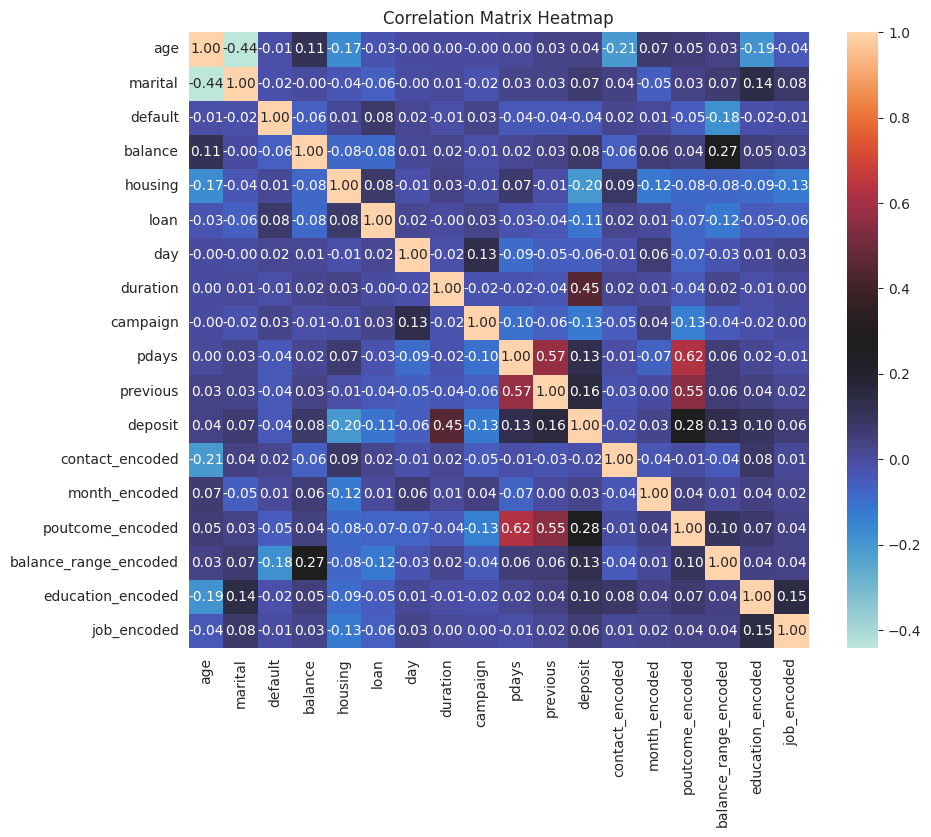

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='icefire', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'deposit',
       'contact_encoded', 'month_encoded', 'poutcome_encoded',
       'balance_range_encoded', 'education_encoded', 'job_encoded'],
      dtype='object')

### pca & ss

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['age', 'marital', 'default', 'housing', 'loan', 'day',
       'duration', 'pdays', 'previous', 'deposit',
       'contact_encoded', 'month_encoded', 'poutcome_encoded',
       'balance_range_encoded', 'education_encoded'],axis=1))

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
pca.explained_variance_ratio_

array([0.34285903, 0.333877  ])

In [ ]:
pca = PCA()
pca.fit(scaled_data)

pca.explained_variance_ratio_

array([0.34285903, 0.333877  , 0.32326397])

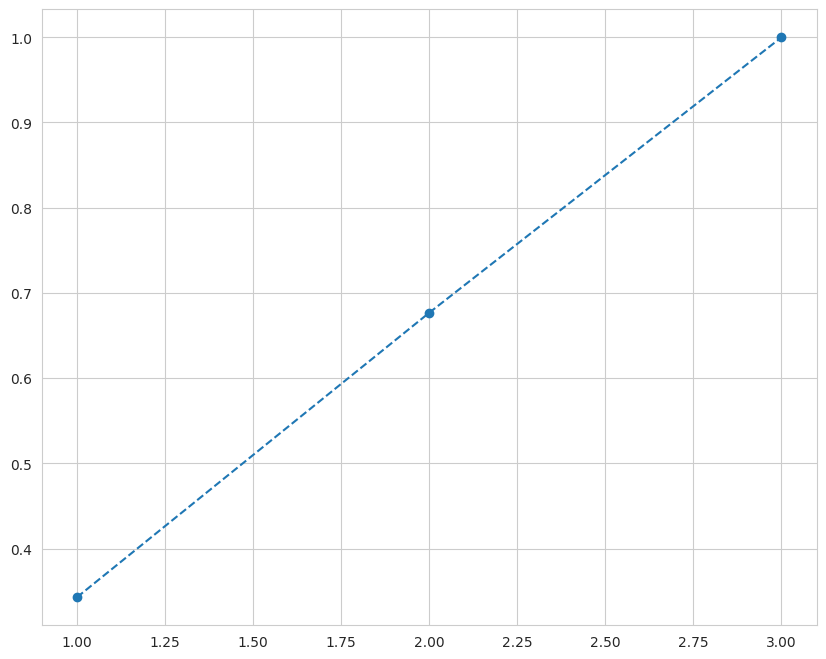

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle='--')

In [ ]:
# Apply PCA
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
pca_scores = pca.transform(scaled_data)

In [ ]:
t0 = time.time()
X_reduced_tsne_pca = TSNE(n_components=2, random_state=42).fit_transform(pca_data)
t1 = time.time()
print("t-SNE on PCA took {:.2f} s".format(t1 - t0))

t-SNE on PCA took 91.22 s


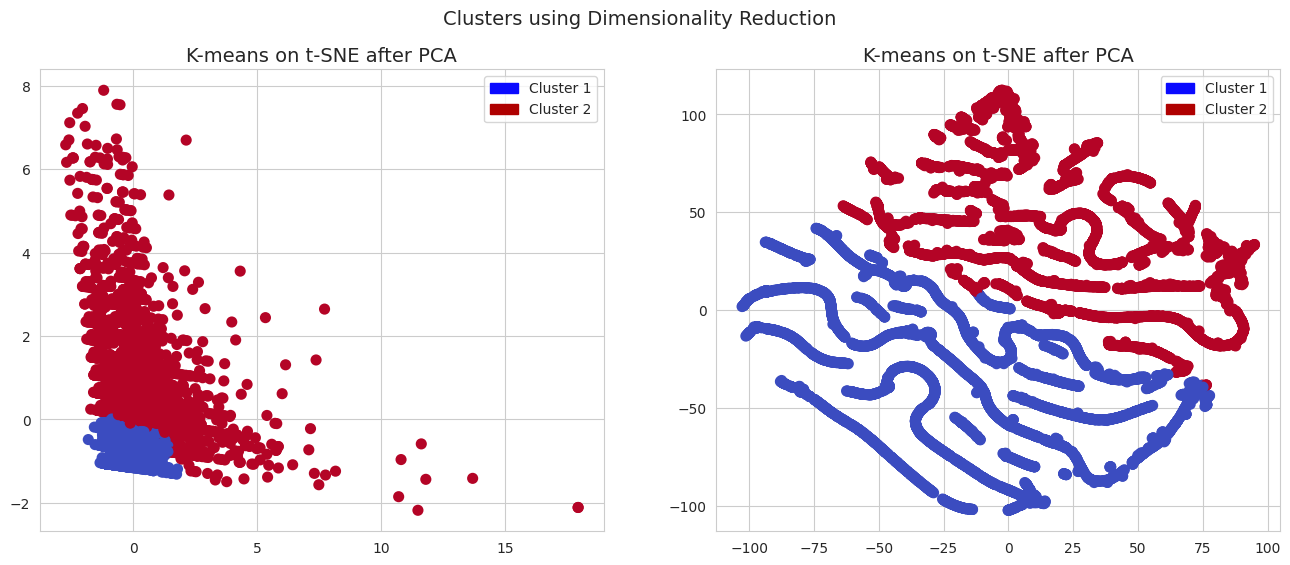

In [ ]:

from sklearn.cluster import KMeans
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
kmeans_labels_tsne = kmeans_tsne.fit_predict(X_reduced_tsne_pca)

# Visualize clusters on PCA and t-SNE reduced data
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Cluster 1')
red_patch = mpatches.Patch(color='#AF0000', label='Cluster 2')

# PCA scatter plot
ax1.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels_tsne, cmap='coolwarm', linewidths=2)
ax1.set_title('K-means on t-SNE after PCA', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# t-SNE scatter plot after PCA
ax2.scatter(X_reduced_tsne_pca[:,0], X_reduced_tsne_pca[:,1], c=kmeans_labels_tsne, cmap='coolwarm', linewidths=2)
ax2.set_title('K-means on t-SNE after PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Define a range of k values to try
k_values = range(2, 15)  # Try k from 2 to 10

In [ ]:
# Initialize lists to store silhouette scores for each k
silhouette_scores = []

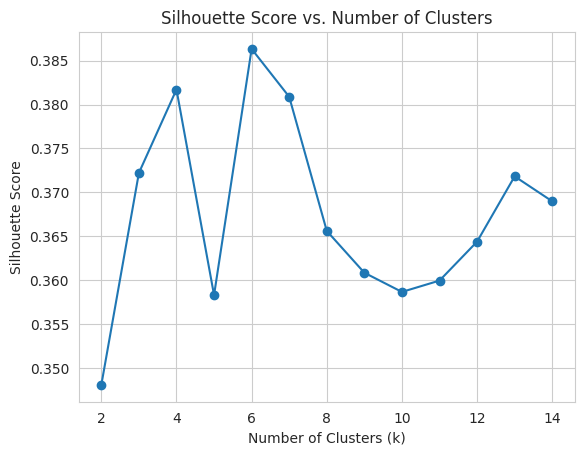

Best k: 6


In [ ]:

# Apply K-means for each k value and compute silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_reduced_tsne_pca)
    silhouette_scores.append(silhouette_score(X_reduced_tsne_pca, kmeans_labels))

# Plot the silhouette scores for each k
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Find the best k based on the highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Best k:", best_k)

In [ ]:
wss = []
for i in range(1,10):
  kmeans_pca = KMeans(n_clusters=i,init='k-means++' ,random_state=42)
  kmeans_pca.fit(pca_scores)
  wss.append(kmeans_pca.inertia_)


<function matplotlib.pyplot.show(close=None, block=None)>

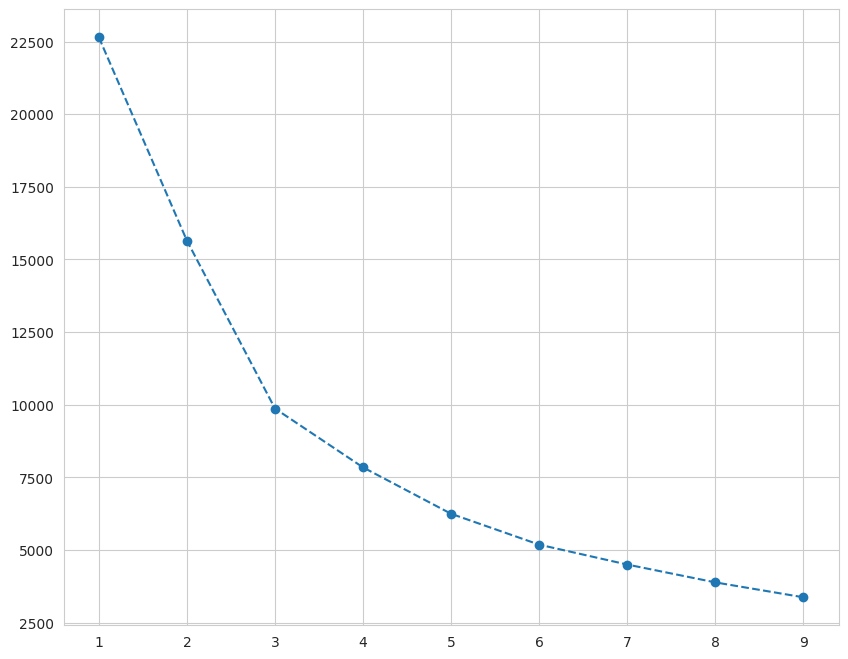

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),wss,marker='o',linestyle='--')
plt.show

In [ ]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++' ,random_state=42)

In [ ]:
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [ ]:
pd.DataFrame(pca_scores)

0         1
0     -0.623161 -1.105036
1     -1.133392 -1.059665
2      1.029810 -0.096114
3      0.877312 -0.339422
4     -1.194114 -0.637485
...         ...       ...
11151 -0.933027 -0.949048
11152  0.215555  0.969766
11153  0.662683  0.353312
11154  0.656244  0.353885
11155  0.747829 -0.071040

[11156 rows x 2 columns]

In [ ]:
df_pca_clusters = pd.concat([df.reset_index(drop=True),pd.DataFrame(pca_scores)],axis=1)

df_pca_clusters ['PCA Clusters'] = kmeans_pca.labels_

In [ ]:
df_pca_clusters.head()

age  marital  default  balance  housing  loan  day  duration  campaign  \
0   59        1        0     2343        1     0    5      1042       1.0   
1   56        1        0       45        0     0    5      1467       1.0   
2   41        1        0     1270        1     0    5      1389       1.0   
3   55        1        0     2476        1     0    5       579       1.0   
4   54        1        0      184        0     0    5       673       2.0   

   pdays  previous  deposit  contact_encoded  month_encoded  poutcome_encoded  \
0   -1.0       0.0        1                1              5                -1   
1   -1.0       0.0        1                1              5                -1   
2   -1.0       0.0        1                1              5                -1   
3   -1.0       0.0        1                1              5                -1   
4   -1.0       0.0        1                1              5                -1   

   balance_range_encoded  education_encoded  job_encoded         0         1  \
0                    1.0                  1            0 -0.623161 -1.105036   
1                    0.0                  1            0 -1.133392 -1.059665   
2                    1.0                  1            9  1.029810 -0.096114   
3                    1.0                  1            7  0.877312 -0.339422   
4                    1.0                  2            0 -1.194114 -0.637485   

   PCA Clusters  
0             1  
1             1  
2             0  
3             0  
4             1

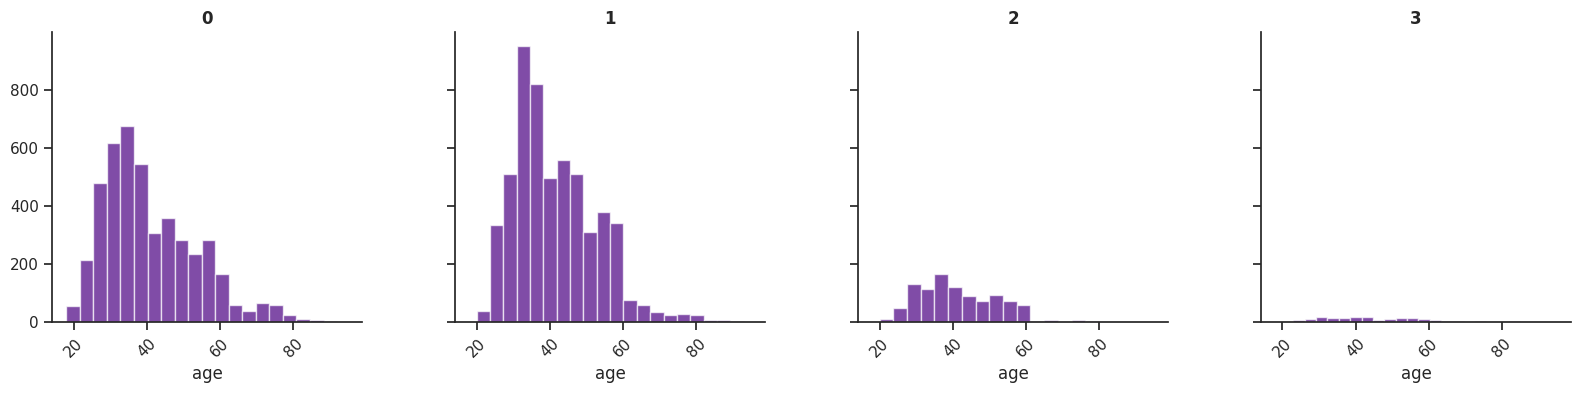

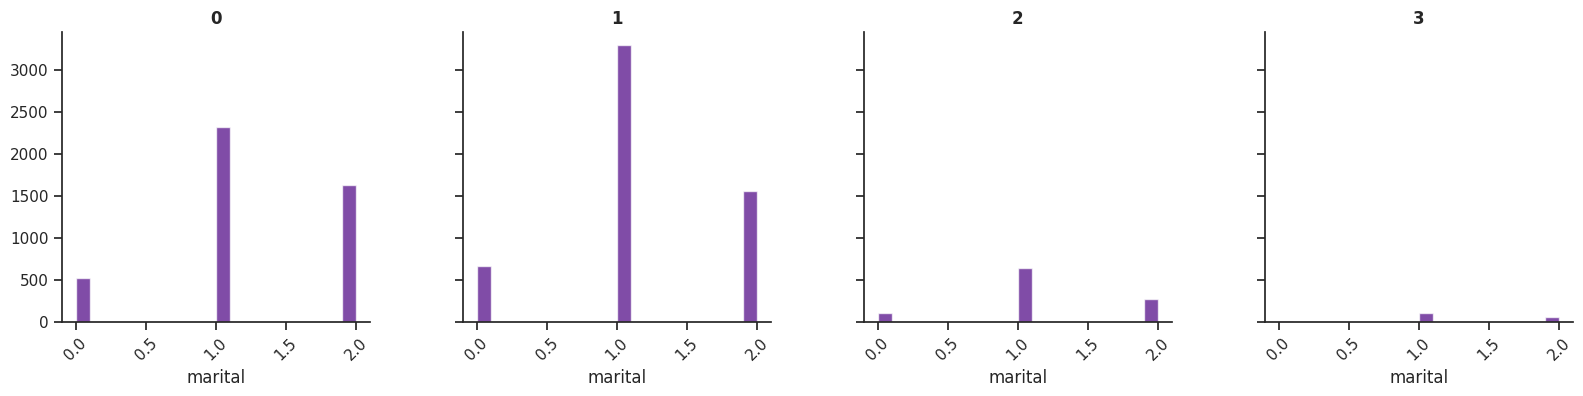

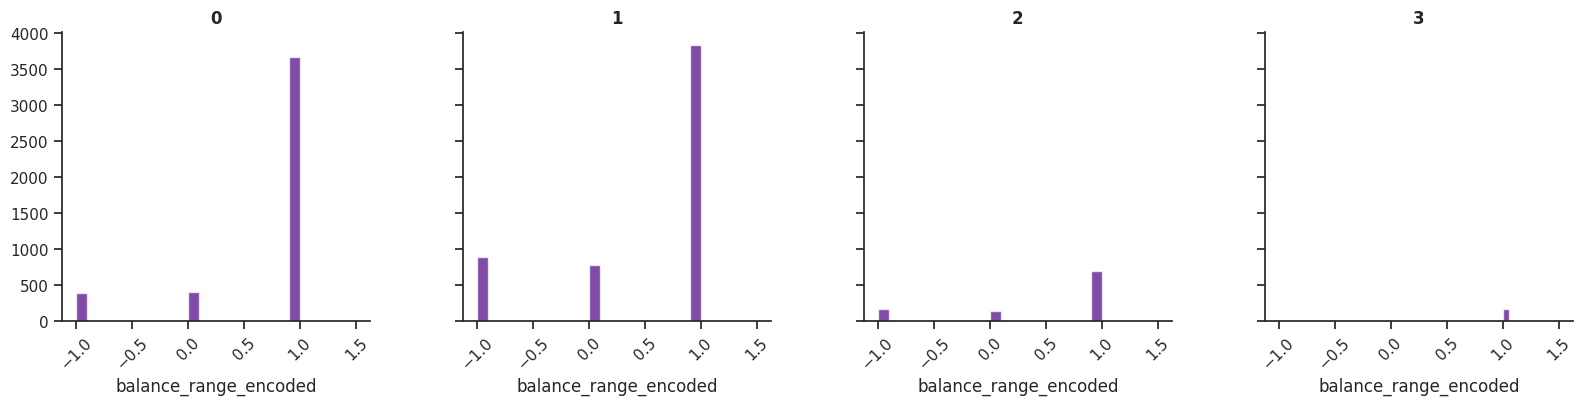

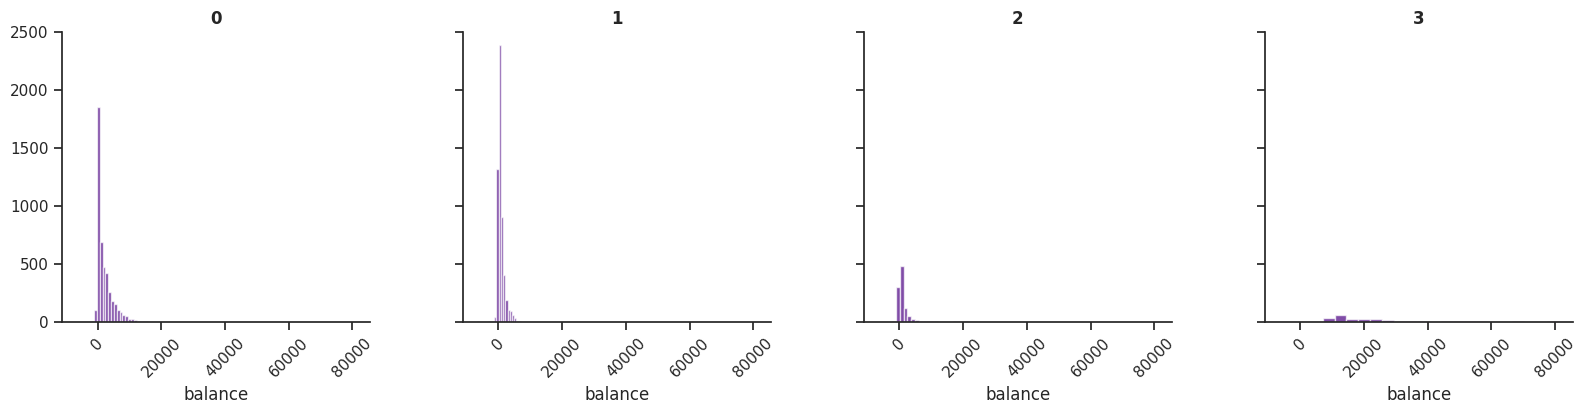

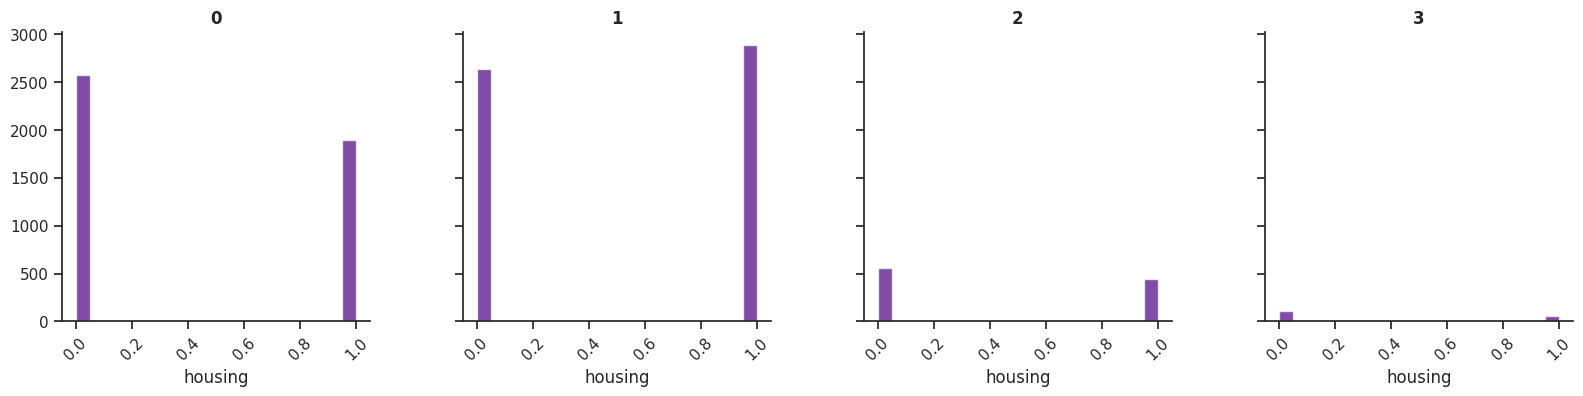

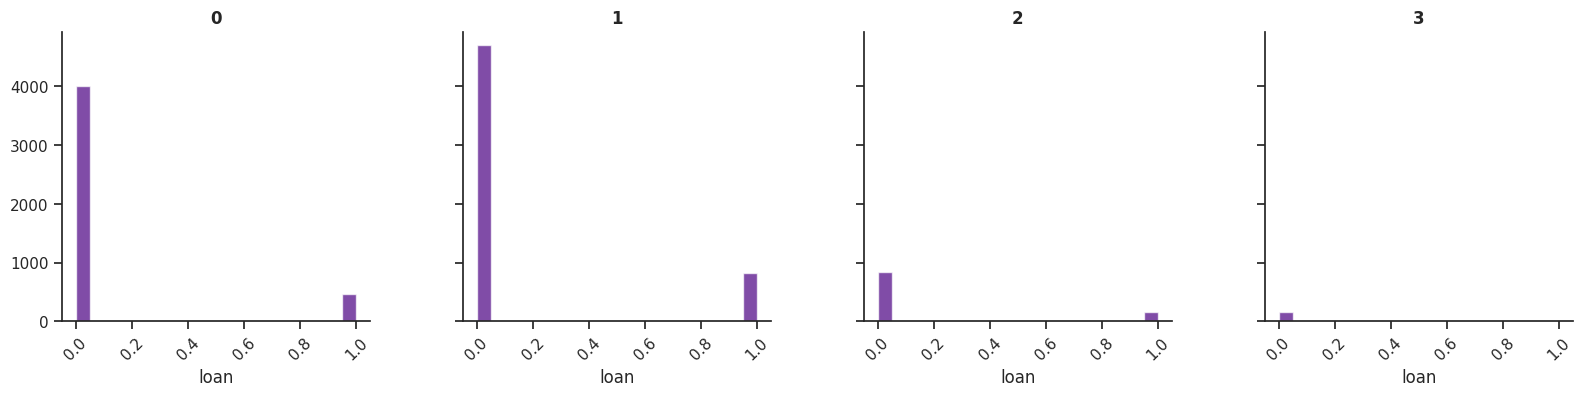

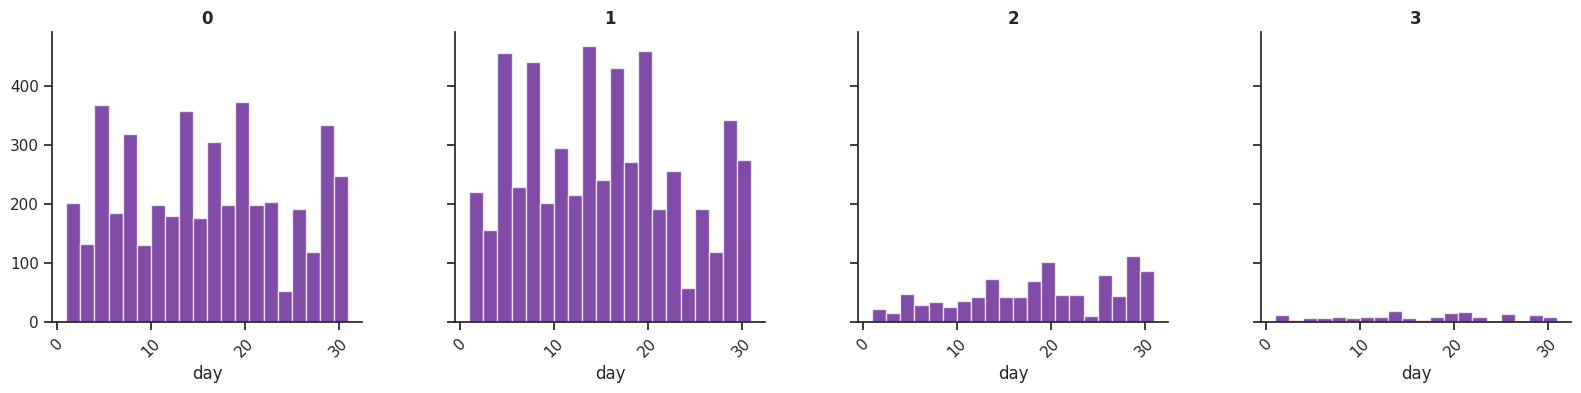

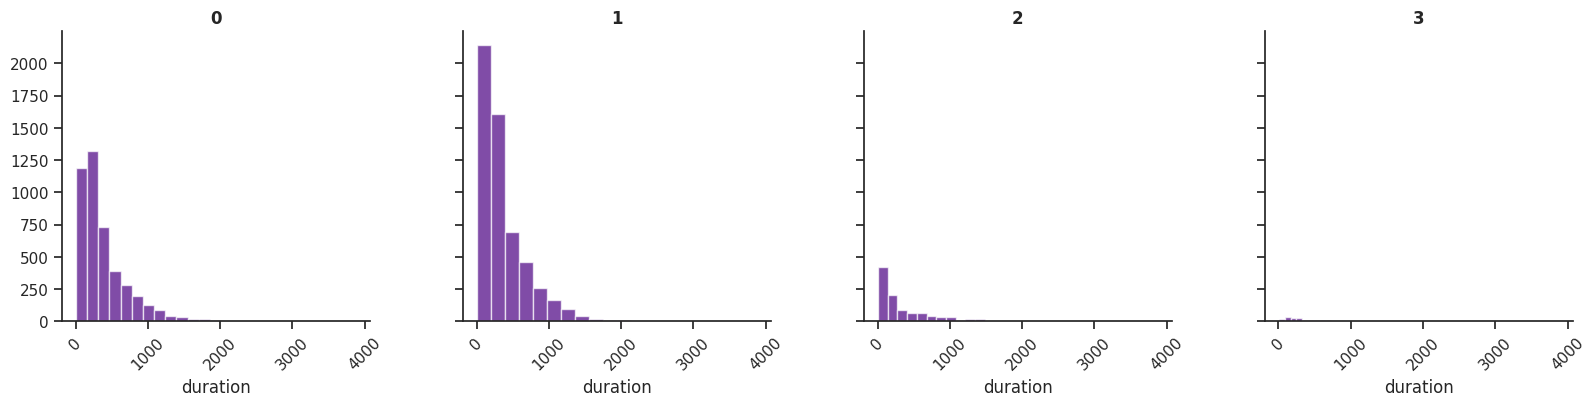

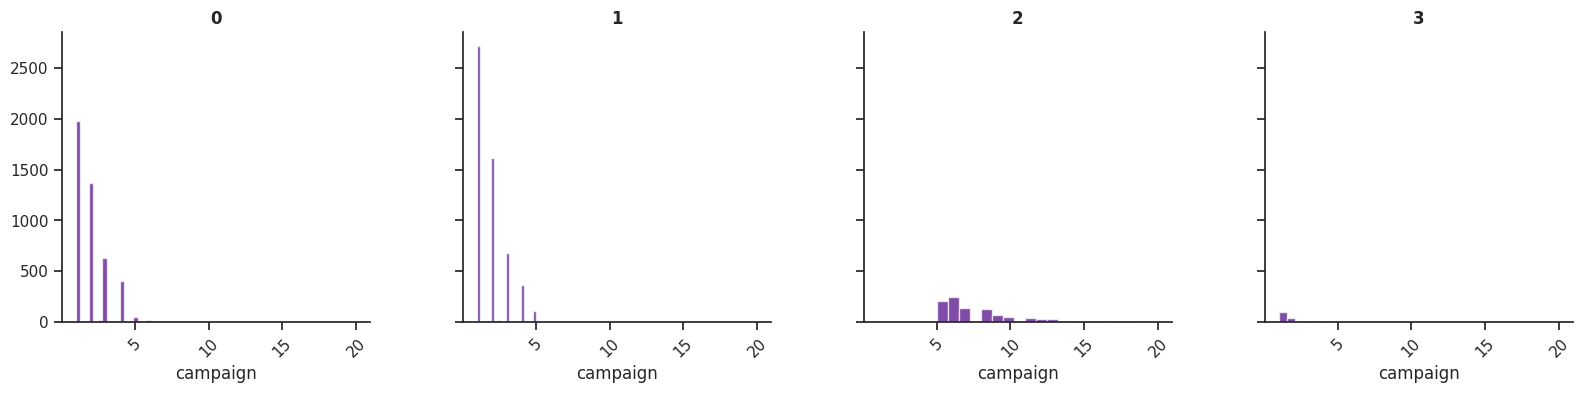

In [ ]:
sns.set(style="ticks")


for c in df_pca_clusters[['age','marital','balance_range_encoded','balance','housing','loan','day','duration','campaign']]:
    grid = sns.FacetGrid(df_pca_clusters, col='PCA Clusters', col_wrap=5, height=4, aspect=1)

    # Plot histogram for each cluster
    grid.map(plt.hist, c, bins=20, color='indigo', alpha=0.7)

    # Adjust spacing between subplots
    grid.fig.subplots_adjust(wspace=0.3, hspace=0.3)

    # Set title for each subplot
    grid.set_titles(col_template="{col_name}", fontweight='bold', fontsize=12)

    # Rotate x-axis labels
    for ax in grid.axes.flat:
        ax.tick_params(axis='x', rotation=45)

    plt.show()

## Normalizing data

In [ ]:
# Scaling data
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# -------------> Robust gives negative values, we should try MinMax
# -------------> or we may shift the values to positive after scaling

In [ ]:
def shapiro_test_normality(dataframe, alpha=0.05):
    ##### data should be clean of nulls as shapiro doesn't handle null values

    for column in dataframe.select_dtypes(include=[np.number]).columns:
        data = dataframe[column]
        stat, p = shapiro(data)

        print(f'Column: {column}')
        print(f'  Statistics={stat}, p={p}')

        # Interpret the results
        if p > alpha:
            print(f'{column} appears to be normally distributed.')
        else:
            print(f'{column} does appear to be not normally distributed.')

In [ ]:
shapiro_test_normality(df)

Column: age
  Statistics=0.9471136331558228, p=0.0
age does appear to be not normally distributed.
Column: balance
  Statistics=0.463509202003479, p=0.0
balance does appear to be not normally distributed.
Column: day
  Statistics=0.9591991901397705, p=0.0
day does appear to be not normally distributed.
Column: duration
  Statistics=0.8009542226791382, p=0.0
duration does appear to be not normally distributed.
Column: campaign
  Statistics=0.5384268760681152, p=0.0
campaign does appear to be not normally distributed.
Column: pdays
  Statistics=0.5562204718589783, p=0.0
pdays does appear to be not normally distributed.
Column: previous
  Statistics=0.3982275128364563, p=0.0
previous does appear to be not normally distributed.


In [ ]:
def QQ_plot_test_normality(dataframe):

    # Selecting numeric columns only
    numeric_cols = dataframe.select_dtypes(include=np.number).columns.tolist()

    # Loop through the numeric columns and create Q-Q plots
    for col in numeric_cols:
        print("")
        sm.qqplot(dataframe[col].dropna(), line='s')  # dropna() to remove missing values, line='s' for standard line
        plt.title(f"Q-Q Plot for {col} column")
        plt.show()

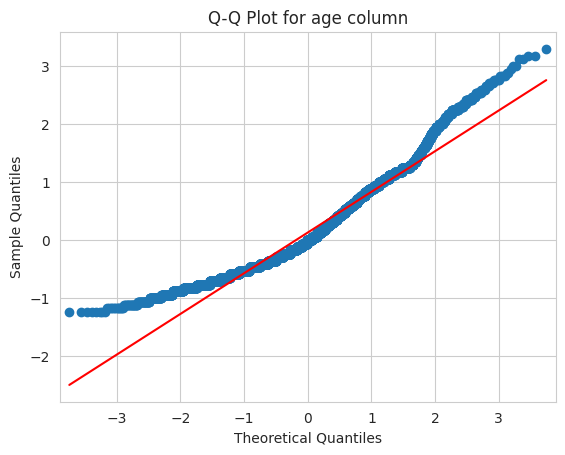

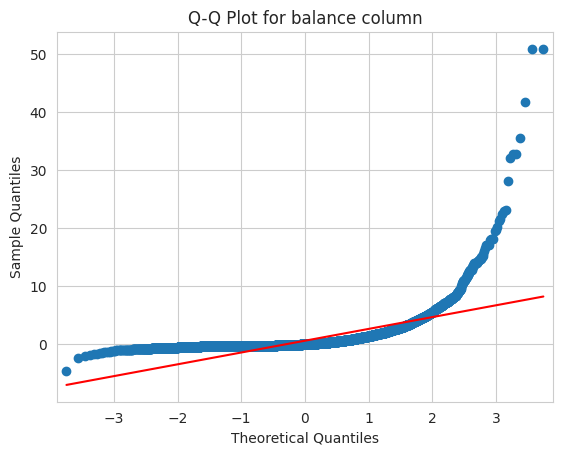

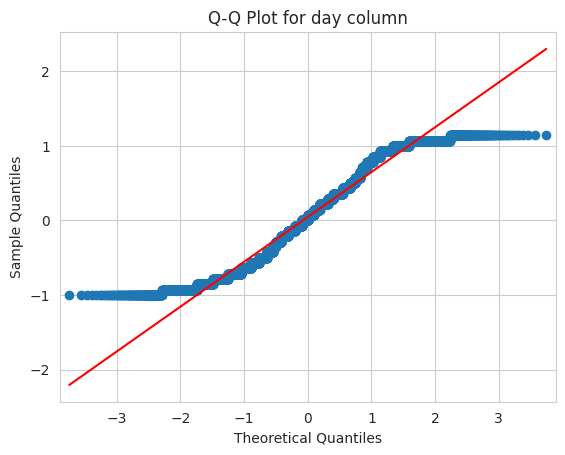

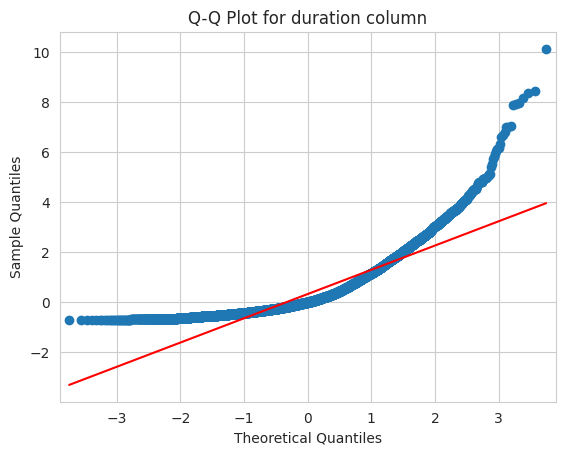

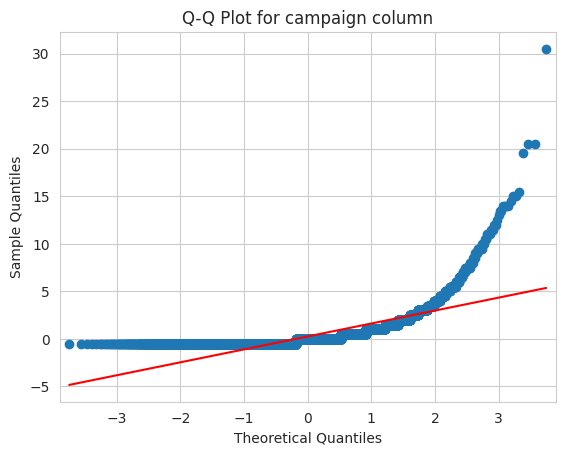

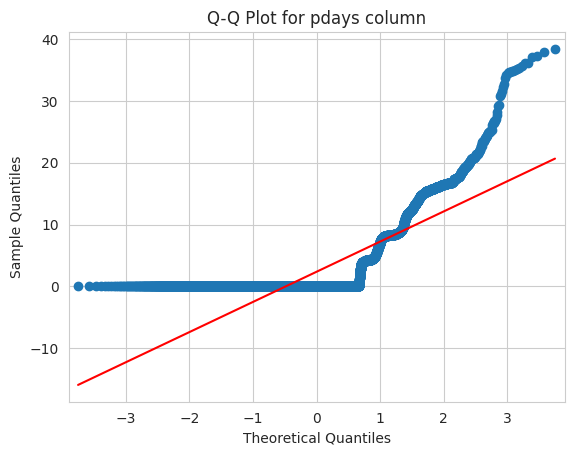

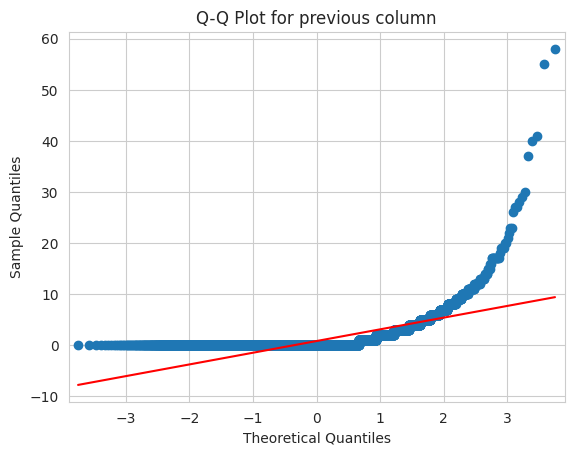

In [ ]:
QQ_plot_test_normality(df)

from shapiro and QQ plot test, it appears that the data is not normaly distributed

## Handling Skewness

by using log transform, square root transformation, BoxCox transformation (can handle negative and positive values), etc...

In [ ]:
def find_best_transformation(df):
    best_transformations = {}

    for column in df.select_dtypes(include=[np.number]).columns:
        column_data = df[column].dropna()

        # Original Shapiro-Wilk test
        orig_stat, orig_p_value = shapiro(column_data)

        # Log transformation
        log_transformed_data = np.log1p(column_data)
        log_stat, log_p_value = shapiro(log_transformed_data)

        # Square root transformation
        sqrt_transformed_data = np.sqrt(column_data)
        sqrt_stat, sqrt_p_value = shapiro(sqrt_transformed_data)

        # Box-Cox transformation
        if column_data.min() > 0:
            boxcox_transformed_data, _ = boxcox(column_data)
            boxcox_stat, boxcox_p_value = shapiro(boxcox_transformed_data)
        else:
            boxcox_stat, boxcox_p_value = np.nan, np.nan

        # Power transformation using sklearn's PowerTransformer
        power_transformer = PowerTransformer()
        power_transformed_data = power_transformer.fit_transform(column_data.values.reshape(-1, 1))
        power_stat, power_p_value = shapiro(power_transformed_data)

        # Compare p-values and select the best transformation
        transformations = {
            "Original": orig_p_value,
            "Log Transformation": log_p_value,
            "Square Root Transformation": sqrt_p_value,
            "Box-Cox Transformation": boxcox_p_value,
            "Power Transformation": power_p_value
        }

        best_transformation = min(transformations, key=transformations.get)
        best_transformations[column] = {"Best Transformation": best_transformation, "Best P-value": transformations[best_transformation]}

    return best_transformations

In [ ]:
find_best_transformation(df)

{'age': {'Best Transformation': 'Original', 'Best P-value': 0.0},
 'balance': {'Best Transformation': 'Original', 'Best P-value': 0.0},
 'day': {'Best Transformation': 'Original', 'Best P-value': 0.0},
 'duration': {'Best Transformation': 'Original', 'Best P-value': 0.0},
 'campaign': {'Best Transformation': 'Original', 'Best P-value': 0.0},
 'pdays': {'Best Transformation': 'Original', 'Best P-value': 0.0},
 'previous': {'Best Transformation': 'Original', 'Best P-value': 0.0}}

data original state is the best transformation, but the data still not normally distributed

conclusion: data is not normally distributed but does not matter, we will use it as it is

## Outliers

### Checking for outliers

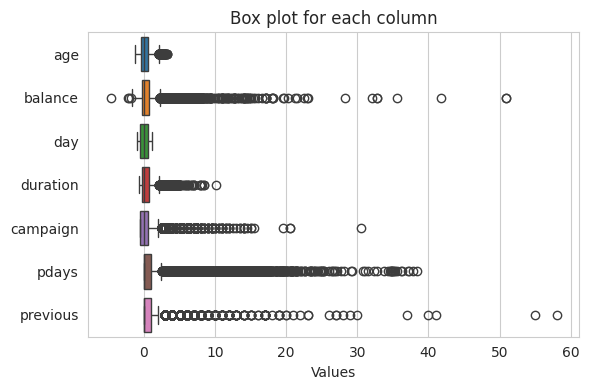

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(df, orient='h')
plt.title('Box plot for each column')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

In [ ]:
df.dtypes


age               float64
job                object
marital            object
education          object
default            object
balance           float64
housing            object
loan               object
contact            object
day               float64
month              object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
deposit            object
balance_range    category
dtype: object

In [ ]:
# Function to identify outliers based on IQR
def find_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)

    return outliers

In [ ]:
for column in df.columns:
    # Check if the column is numeric (assuming outliers are relevant for numeric data)
    if pd.api.types.is_numeric_dtype(df[column]):
        outliers = find_outliers(df[column])
        num_outliers = outliers.sum()

        print(f"Number of outliers in '{column}': {num_outliers}")

Number of outliers in 'age': 171
Number of outliers in 'balance': 1055
Number of outliers in 'day': 0
Number of outliers in 'duration': 637
Number of outliers in 'campaign': 600
Number of outliers in 'pdays': 2750
Number of outliers in 'previous': 1258


Based on that, there are alot of outliers in columns -> balance, pdays, prevoius

### Handling outliers

In [ ]:
def handle_outliers_iqr(data, columns):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)

        # Calculate IQR
        iqr = q3 - q1

        # Define lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replace outliers with the boundaries of IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

In [ ]:
def handle_outliers_zscore(data, columns, threshold=3):
    for column in columns:
        z_scores = (data[column] - data[column].mean()) / data[column].std()

        # Identify outliers based on Z-scores
        outliers = np.abs(z_scores) > threshold

        # Replace outliers with the mean of the column
        data[column] = np.where(outliers, data[column].mean(), data[column])

    return data

In [ ]:
# outliers columns
outliers_columms = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Handling outliers using IQR
df_iqr_handled = handle_outliers_iqr(df.copy(), outliers_columms)

# Handling outliers using Z-score
# df_zscore_handled = handle_outliers_zscore(df.copy(), outliers_columms)

# replacing modified data with the original
for c in outliers_columms:
    df[c] = df_iqr_handled[c]

there is no outliers now, and the numeric data is scaled

### Encoding

# Task 3: Analyze and Visualize insights.

In [ ]:
#Bonus Plotly

In [ ]:
fig = px.bar(df, x='poutcome', color='loan', title='Count Plot for poutcome with Hue of Loan',
             color_discrete_map={'yes': 'green', 'no': 'red'},
             labels={'poutcome': 'Outcome', 'loan': 'Loan Status'})

# Show the interactive plot
fig.show()

In [ ]:
count_data = df.groupby(['poutcome', 'loan']).size().reset_index(name='count')
count_data

poutcome loan  count
0  failure   no   1060
1  failure  yes    168
2    other   no    483
3    other  yes     54
4  success   no   1020
5  success  yes     51
6  unknown   no   7133
7  unknown  yes   1187

In [ ]:
pivot_data = pd.pivot_table(count_data, values='count', index='poutcome', columns='loan', fill_value=0)

# Calculate the percentage of 'loan=yes' for each 'poutcome' category
pivot_data['percentage_loan_yes'] = (pivot_data['yes'] / (pivot_data['yes'] + pivot_data['no'])) * 100

# Display the resulting DataFrame
print(pivot_data)


loan        no   yes  percentage_loan_yes
poutcome                                 
failure   1060   168            13.680782
other      483    54            10.055866
success   1020    51             4.761905
unknown   7133  1187            14.266827


In [ ]:
# Feature engineering

# Task 4: Build Clustering Models.

# Task 5: Analyzing Similarities and Differences Between Cluster Samples